<a href="https://colab.research.google.com/github/EnzoGolfetti/praticas_python/blob/main/ECOO11_an_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uma análise do ETF ECOO11 e os retornos de ativos ESG

---
O ETF ECOO11 replica o  [Índice Carbono Eficiente (ICO2)](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-sustentabilidade/indice-carbono-eficiente-ico2.htm) e é gerido pela BlackRock, a maior gestora de ativos do mundo. 

A ideia do ETF é ao mesmo tempo que trás rentabilidade ao investir em empresas sólidas, melhora a eficiência de Carbono nos investimentos.

Os Datasets utilizados aqui foram extraídos do portal Yahoo Finance e do Google Finance e contém dados históricos da variação dos ativos desde Junho/2012.

Todos os datasets estão publicamente disponíveis [aqui](https://github.com/EnzoGolfetti/praticas_python/tree/main/ecoo11_analysis).

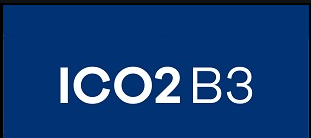

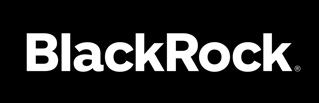

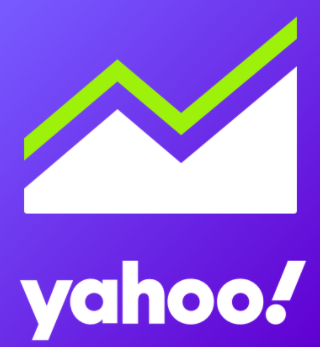

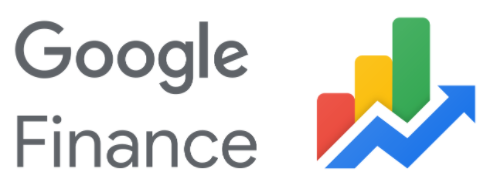

##Motivação do projeto e hipóteses iniciais:

---
Nossa motivação com esse projeto é entender mais sobre o desempenho dos ativos ESG visto a urgente necessidade de se mudar os padrões de investimento para também mudar o padrão de produção e poluição na economia mundial e por consequência auxiliar na minimização dos efeitos climáticos do fenômeno conhecido como aquecimento global.

Nossa principal motivação para escolher especificamente o ETF ECOO11 da BlackRock foi de que ele é um ativo pautado em princípios ESG principalmente no 'E' de Environmental que surgiu em 2012 antes dessa [onda](https://valorinveste.globo.com/objetivo/hora-de-investir/noticia/2020/07/14/esg-onda-passageira-ou-novo-normal-dos-investimentos.ghtml) de se investir em ESG que começou com a pandemia de Coronavírus em 2020 e antes mesmo do assunto meio ambiente ser pauta diária nas discussões midiáticas e nas redes sociais.

Nossas hipóteses iniciais são de que o ativo teve grande valorização após o início da pandemia, em linha com os outros ativos desse tipo, mas de que antes, sua valorização não era tão boa visto que não havia interesse dos investidores na classe de ativo denominada 'ser ESG' e que também seu volume de transação é menor do que outros ETF's do mesmo tamanho que ele.

Além, queremos testar também sua valorização frente ao principal benchmark de fundos de ação do mercado brasileiro que é o índice IBOVESPA e para tal medição selecionamos o ETF BOVA11 que replica esse índice, que também é antigo no mercado brasileiro tendo dados desde 2012 e que é gerido pela mesma companhia, a BlackRock, o que nos permite observar como foi o desempenho na própria gestão desses ETF's para garantir sua valorização. Mais ainda, queremos testar como foi o rendimento de ECOO11 frente a um dos maiores poluentes negociados em bolsa: o Petróleo.

Comparando esse ativo frente as esses dois outros também nos ajudará a responder se historicamente um ativo ESG realmente rendeu mais do que ativos que não seguem esses princípios como agora popularmente saísse falando nos principais meios econômicos e financeiros - principalmente aqueles voltados ao investidor pessoa física - que é quem mais tem a perder no mercado com baixos rendimentos.

Uma última hipótese inicial que prentendemos observar é a projeção para os preços e valorização futuras de ECOO11, observando que todas as projeções apontam para crescimento exponencial dessa classe de ativo.


In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 4.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=0a941b9d0cf0b4aa1774868ce139746a30f876623898d2036518b4191d9ff6a1
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tsa.api as tsa
import yfinance
import matplotlib.ticker as ticker

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Leitura e explorações iniciais do Dataset

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/ecoo11_analysis/ECOO11sa_yahoo.csv', sep=';')

In [5]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,15/06/2012,50.520000,50.520000,50.520000,50.520000,50.520000,0.0
1,18/06/2012,50.830002,50.830002,50.830002,50.830002,50.830002,0.0
2,19/06/2012,51.700001,51.700001,51.700001,51.700001,51.700001,0.0
3,20/06/2012,51.490002,51.490002,51.490002,51.490002,51.490002,0.0
4,21/06/2012,50.070000,50.070000,50.070000,50.070000,50.070000,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2244 non-null   object 
 1   Open       2240 non-null   float64
 2   High       2240 non-null   float64
 3   Low        2240 non-null   float64
 4   Close      2240 non-null   float64
 5   Adj Close  2240 non-null   float64
 6   Volume     2240 non-null   float64
dtypes: float64(6), object(1)
memory usage: 122.8+ KB


In [7]:
#transformando a coluna de Date em Datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', yearfirst=True)

In [8]:
data['Date']

0      2012-06-15
1      2012-06-18
2      2012-06-19
3      2012-06-20
4      2012-06-21
          ...    
2239   2021-06-28
2240   2021-06-29
2241   2021-06-30
2242   2021-07-01
2243   2021-07-02
Name: Date, Length: 2244, dtype: datetime64[ns]

###Observações gráficas dos preços de abertura, pico, base e fechamento

---
Dataset recebendo os tratamentos necessários, começamos a observar graficamente seus valores e encontrar primeiras respostas.


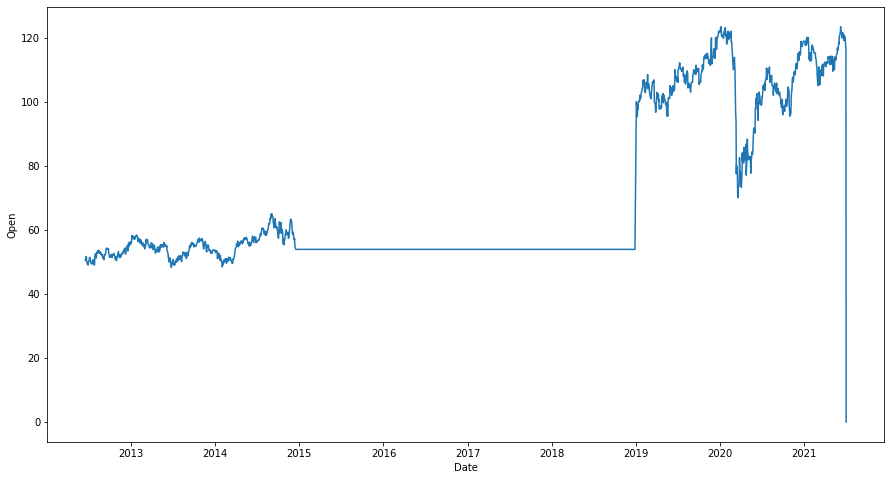

In [9]:
plt.figure(figsize=(15,8))
sns.lineplot(data=data, x='Date', y='Open')

Observamos uma estranha linha entre 2015 e 2019, vamos investigar o que pode estar causando isso nos dados e depois voltamos a formatar o gráfico para deixá-lo mais específico.

In [10]:
data[(data['Date'] >= '2015-01-01') & (data['Date'] <= '2019-01-01')]

,Date,Open,High,Low,Close,Adj Close,Volume
629,2015-01-02,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
630,2015-01-05,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
631,2015-01-06,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
632,2015-01-07,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
633,2015-01-08,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
...,...,...,...,...,...,...,...
1619,2018-12-20,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
1620,2018-12-21,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
1621,2018-12-26,53.889999,53.889999,53.889999,53.889999,53.889999,0.0
1622,2018-12-27,53.889999,53.889999,53.889999,53.889999,53.889999,0.0


###Aparentemente existe um erro de registros de praticamente 4 anos nas cotações de ECOO11, iremos tentar ler os dados com uma base do Google Finance agora.

##Leitura e exploração inicial dos dados de ECOO11 do Google Finance

Primeiro devemos preparar o dataset e realizar os tratamentos adequados para posteriores análises. 

In [11]:
dados = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/ecoo11_analysis/ECOO11_google_finance.csv', sep=',', decimal=',')
dados.head()

,Date,Open,High,Low,Close,Volume
0,15/06/2012 16:56:00,50.01,50.27,49.00,50.21,307770
1,19/06/2012 16:56:00,50.76,51.79,50.60,51.69,198900
2,20/06/2012 16:56:00,51.68,51.69,50.20,51.50,155510
3,21/06/2012 16:56:00,50.60,51.21,50.07,50.07,83580
4,22/06/2012 16:56:00,50.24,50.30,49.55,49.92,13170


In [12]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1983 non-null   object 
 1   Open    1983 non-null   float64
 2   High    1983 non-null   float64
 3   Low     1983 non-null   float64
 4   Close   1983 non-null   float64
 5   Volume  1983 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 93.1+ KB


In [13]:
#transformando a coluna Date em Datetime
dados['Date'] = pd.to_datetime(dados['Date'], yearfirst=True, format='%d/%m/%Y', exact=False)

In [14]:
dados.head()

,Date,Open,High,Low,Close,Volume
0,2012-06-15,50.01,50.27,49.00,50.21,307770
1,2012-06-19,50.76,51.79,50.60,51.69,198900
2,2012-06-20,51.68,51.69,50.20,51.50,155510
3,2012-06-21,50.60,51.21,50.07,50.07,83580
4,2012-06-22,50.24,50.30,49.55,49.92,13170


In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1983 non-null   datetime64[ns]
 1   Open    1983 non-null   float64       
 2   High    1983 non-null   float64       
 3   Low     1983 non-null   float64       
 4   Close   1983 non-null   float64       
 5   Volume  1983 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 93.1 KB


In [16]:
dados.columns = dados.columns.str.lower()

In [17]:
#função para a criação de features de período e da rentabilidade do ativo
def feature_prod(df: pd.DataFrame):
  """Função cria colunas para cada periodo Day, Month e Year e cria coluna com a rentabilidade do ativo em relação ao período anterior"""
  df['year'] = df['date'].dt.year
  df['month'] = df['date'].dt.month
  df['day'] = df['date'].dt.day
  df['rentabilidade'] = (((df['close'] / df['close'].shift()) * 100) - 100)

In [18]:
feature_prod(dados)
dados.head()

,date,open,high,low,close,volume,year,month,day,rentabilidade
0,2012-06-15,50.01,50.27,49.00,50.21,307770,2012,6,15,NaN
1,2012-06-19,50.76,51.79,50.60,51.69,198900,2012,6,19,2.947620
2,2012-06-20,51.68,51.69,50.20,51.50,155510,2012,6,20,-0.367576
3,2012-06-21,50.60,51.21,50.07,50.07,83580,2012,6,21,-2.776699
4,2012-06-22,50.24,50.30,49.55,49.92,13170,2012,6,22,-0.299581


#Análise gráfica e conclusões sobre ECOO11

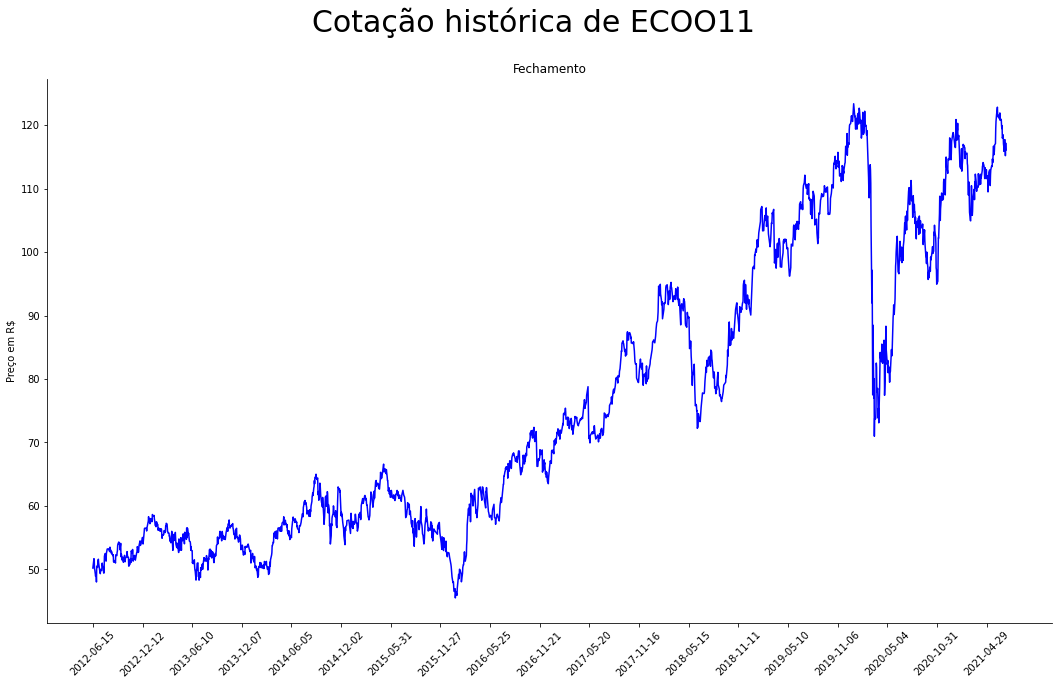

In [19]:
plt.figure(figsize=(18,10))
ax = sns.lineplot(data=dados, x='date', y='close', color='blue', alpha=3)
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Fechamento')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=180, offset=0))
ax.tick_params('x', rotation=45)
sns.despine()
plt.suptitle('Cotação histórica de ECOO11', fontsize=30)
plt.show()

Novamente aparenta existir alguma falha nos dados entre 2017 e 2018, exploremos o que pode ser.

In [20]:
dados[(dados['date']>='2017-05-01') & (dados['date']<='2017-07-01')]

,date,open,high,low,close,volume,year,month,day,rentabilidade
1082,2017-05-02,75.00,76.75,75.00,76.75,2100,2017,5,2,2.401601
1083,2017-05-03,76.16,76.36,76.16,76.36,600,2017,5,3,-0.508143
1084,2017-05-04,75.36,75.38,75.36,75.38,1000,2017,5,4,-1.283394
1085,2017-05-05,73.26,75.88,73.26,75.77,1520,2017,5,5,0.517379
1086,2017-05-09,76.38,76.38,76.36,76.36,500,2017,5,9,0.778672
1087,2017-05-10,77.00,77.45,77.00,77.45,80,2017,5,10,1.427449
1088,2017-05-15,78.81,78.81,78.80,78.80,20,2017,5,15,1.743060
1089,2017-05-18,41.62,71.49,41.62,70.67,1080,2017,5,18,-10.317259
1090,2017-05-19,71.00,71.00,71.00,71.00,20,2017,5,19,0.466959
1091,2017-05-22,71.00,71.00,69.50,69.93,1110,2017,5,22,-1.507042


Não aparenta ser um erro nos dados, mas sim, algo que realmente aconteceu, não é comum em pequenos espaços de tempo haver grandes variações nos dados, porém pode acontecer.

Vamos continuar portanto, observando nosso dados.

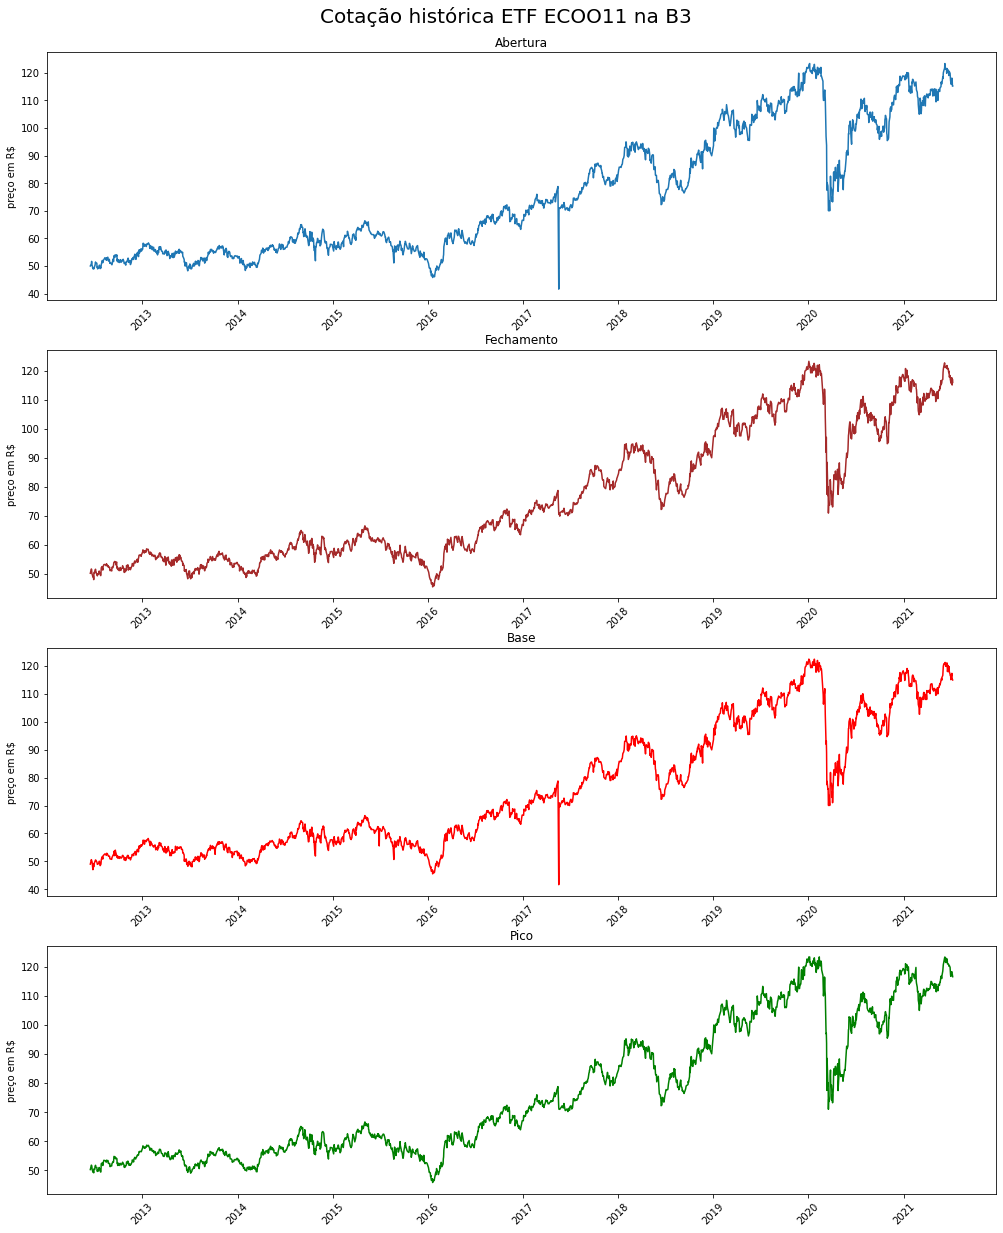

In [21]:
fig, axs = plt.subplots(4,1, figsize=(17,21))

sns.lineplot(data=dados, x='date', y='open', ax=axs[0])
axs[0].set_title('Abertura')
axs[0].set_xlabel(None)
axs[0].set_ylabel('preço em R$')
axs[0].tick_params('x', labelrotation=45,)

sns.lineplot(data=dados, x='date', y='close', ax=axs[1], color='brown')
axs[1].set_title('Fechamento')
axs[1].set_xlabel(None)
axs[1].set_ylabel('preço em R$')
axs[1].tick_params('x', labelrotation=45)

sns.lineplot(data=dados, x='date', y='low', ax=axs[2], color='red')
axs[2].set_title('Base')
axs[2].set_xlabel(None)
axs[2].set_ylabel('preço em R$')
axs[2].tick_params('x', labelrotation=45)

sns.lineplot(data=dados, x='date', y='high', ax=axs[3], color='green')
axs[3].set_title('Pico')
axs[3].set_xlabel(None)
axs[3].set_ylabel('preço em R$')
axs[3].tick_params('x', labelrotation=45)

plt.suptitle('Cotação histórica ETF ECOO11 na B3', y=0.91, fontsize=20)
plt.show()

Depois de analisar novamente os gráficos e pesquisar mais a fundo, identificamos que a queda de quase 50% no valor do ativo se deve ao dia seguinte do **Joesley Day** [(17 de maio de 2017)](https://www.suno.com.br/artigos/joesley-day/) em que de forma generalizada os preços da Bolsa de valores brasileira caíram.

O que mais nos chama atenção nos gráficos é que apesar de ser um ativo que parece estar se valorizando com a preocupação com o meio ambiente e a mudança climática, este sofreu da mesma forma que os outros ativos brasileiros no 'crash' pandêmico, quando a bolsa brasileira sofreu [6 *circuit breaker*](https://blog.vexter.com.br/circuit-breaker/).

###Desde o começo da pandemia, em todo o mundo começou grande corrida nos mercados por investimentos mais ambientais e sociais, conhecidos como ESG. O ECOO11 que existe desde 2012 tem essa pauta desde seu início, vamos observar mais de perto do ano de 2020 até agora e ver como está sendo sua recuperação.

In [22]:
dados_2020 = dados[dados['date']>='2020-01-01']

In [23]:
dados_2020.head()

,date,open,high,low,close,volume,year,month,day,rentabilidade
1610,2020-01-02,122.00,122.78,122.00,122.78,4110,2020,1,2,1.807629
1611,2020-01-03,122.79,123.40,122.48,123.40,4390,2020,1,3,0.504968
1612,2020-01-06,123.40,123.40,121.84,121.95,190,2020,1,6,-1.175041
1613,2020-01-07,121.20,121.51,121.20,121.37,690,2020,1,7,-0.475605
1614,2020-01-08,120.68,121.75,120.68,121.45,270,2020,1,8,0.065914


In [24]:
#Vamos setar parâmetros padrões para a biblioteca Matplotlib para as visualizações serem construídas mais rápido
import matplotlib as mpl
#mpl.rcParams.keys()
mpl.rcParams['figure.figsize'] = (15,8)
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12

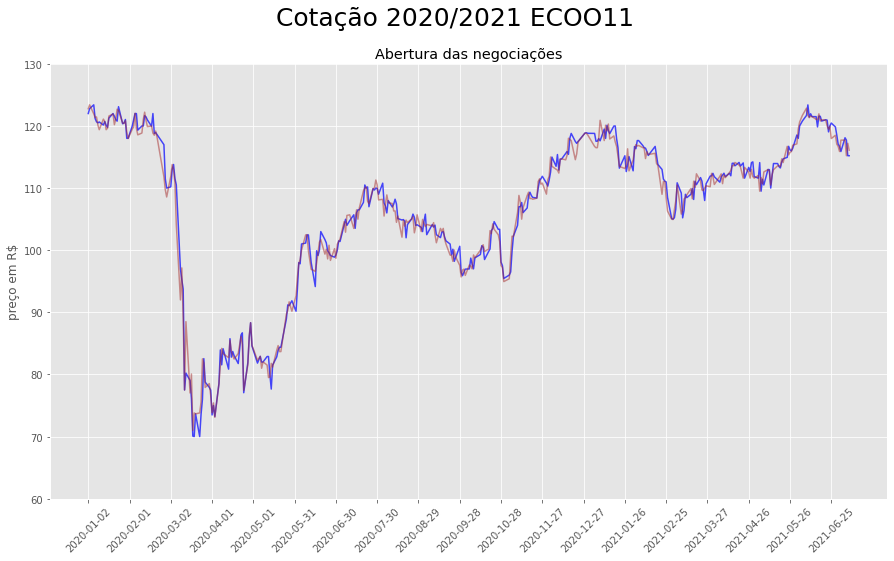

In [25]:
plt.style.use('ggplot')

ax = sns.lineplot(data=dados_2020, x='date', y='open', color='blue', alpha=0.7)

sns.lineplot(data=dados_2020, x='date', y='close', color='brown', alpha=0.5)

ax.set_xlabel(None)
ax.set_ylabel('preço em R$')
ax.set_title('Abertura das negociações')

plt.tick_params('x', labelrotation=45)
plt.ylim(60,130)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=30, offset=0))


sns.despine()
plt.suptitle('Cotação 2020/2021 ECOO11', fontsize=25)
plt.show()

Podemos observar que a cotação do ETF acompanha as fases da pandemia no Brasil, resumidamente:

- Março de 2020: Crash pandêmico;
- Novembro de 2020: Início segunda onda no Brasil;
- Março 2021: Pico segunda onda/ terceira onda no Brasil;
- Maio 2021 relaxamento da pandemia ao redor do mundo e do Brasil que valoriza os ativos em geral.

###Primeiras explorações feitas, vamos entrar mais a fundo nos dados de ECOO11, decompondo a série em seus principais componentes que são tendência, sazonalidade e ruído. Depois vamos construir e plotar a média móvel semanal para entender o desempenho do ETF durante as semanas e em seguida fazer a média móvel anual para suavizarmos os outliers e as crises e rallys que podem ter feito o ativo cair ou subir muito.

In [26]:
#construindo uma função para a decomposição da serie temporal
#já importamos a biblioteca statsmodels que tem uma série de funções e métodos estatísticos robustos, aqui vamos utilizar o seasonal_decompose()
def decomp_st(dataframe: pd.DataFrame, coluna_data: str,  coluna_dados: str, model_decomp: str, extrapolacao: int, titulo_graf: str, period=None):
  """Função que decompõe a serie temporal e plota cada um de seus componentes utilizando o método seasonal_decompose da statsmodels library
  Atentar para period ser passado como úlimo parâmtero senão incorrerá em erro, se desejar o period padrão do dataset inputado deixar default"""
  import statsmodels.tsa.api as tsa
  df = dataframe.set_index(coluna_data)
  df = df.asfreq('D', method='ffill')
  decomposition = tsa.seasonal_decompose(df[[coluna_dados]], model=model_decomp, freq=period, extrapolate_trend=extrapolacao)
  fig, ax = plt.subplots(4,1, figsize=(15,15), sharex=True)

  ax[0].plot(decomposition.observed, color='blue')
  ax[0].set_title('Observado')
  ax[0].set_ylabel('Preço em R$')

  ax[1].plot(decomposition.trend, color='green')
  ax[1].set_title('Tendência')

  ax[2].plot(decomposition.seasonal, color='purple', alpha=0.3)
  ax[2].set_title('Sazonalidade')

  ax[3].plot(decomposition.resid, color='red')
  ax[3].set_title('Residual')
  ax[3].set_xlabel('Data')

  plt.suptitle(titulo_graf, fontsize=22, y=0.92)
  plt.show()

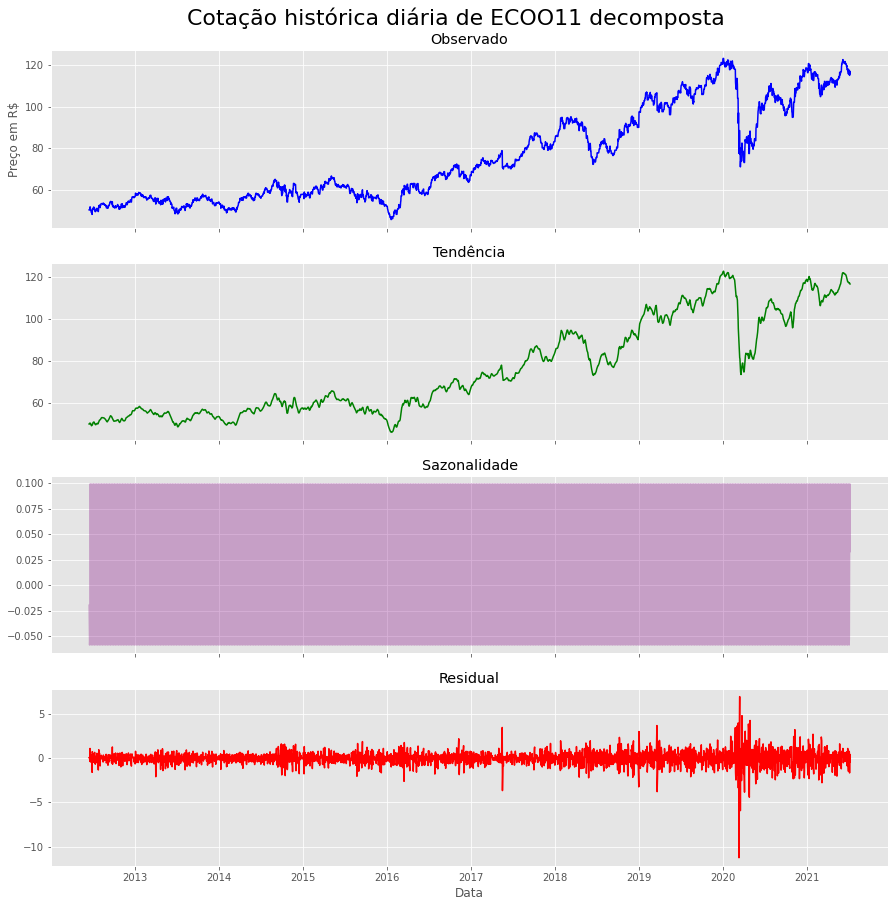

In [27]:
#decomposição de period = diário
decomp_st(dados, 'date', 'close', 'additive', 30, 'Cotação histórica diária de ECOO11 decomposta')

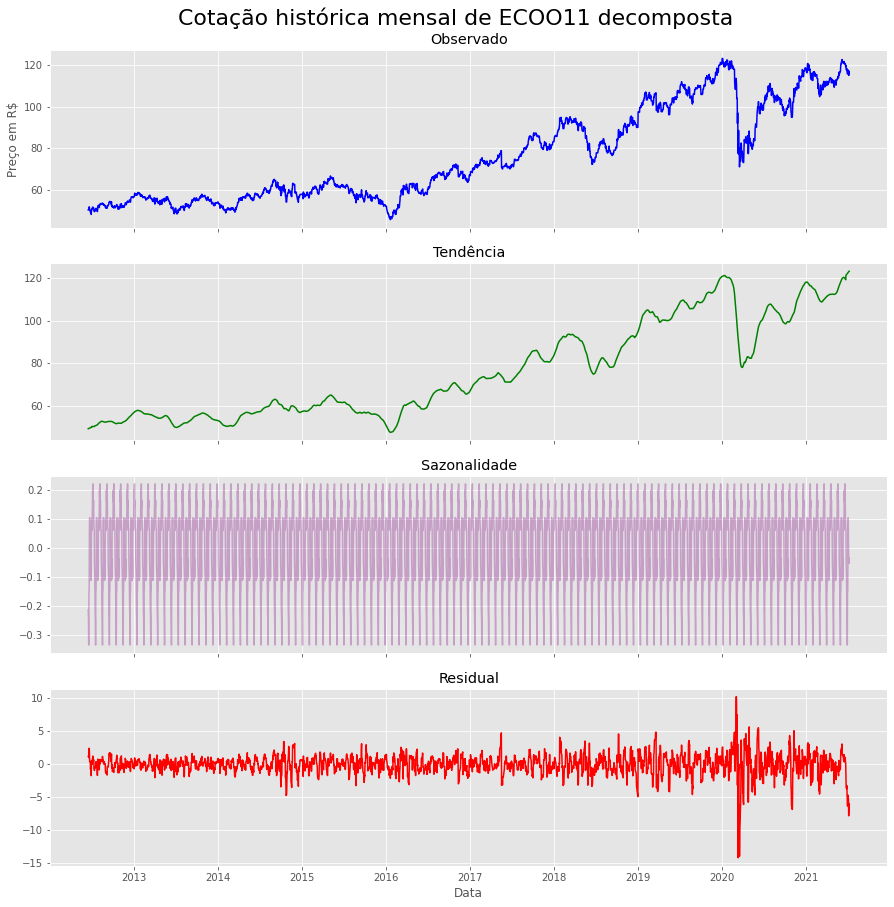

In [28]:
#decomposição de period = mensal
decomp_st(dados, 'date', 'close', 'additive', 30, 'Cotação histórica mensal de ECOO11 decomposta', 30)

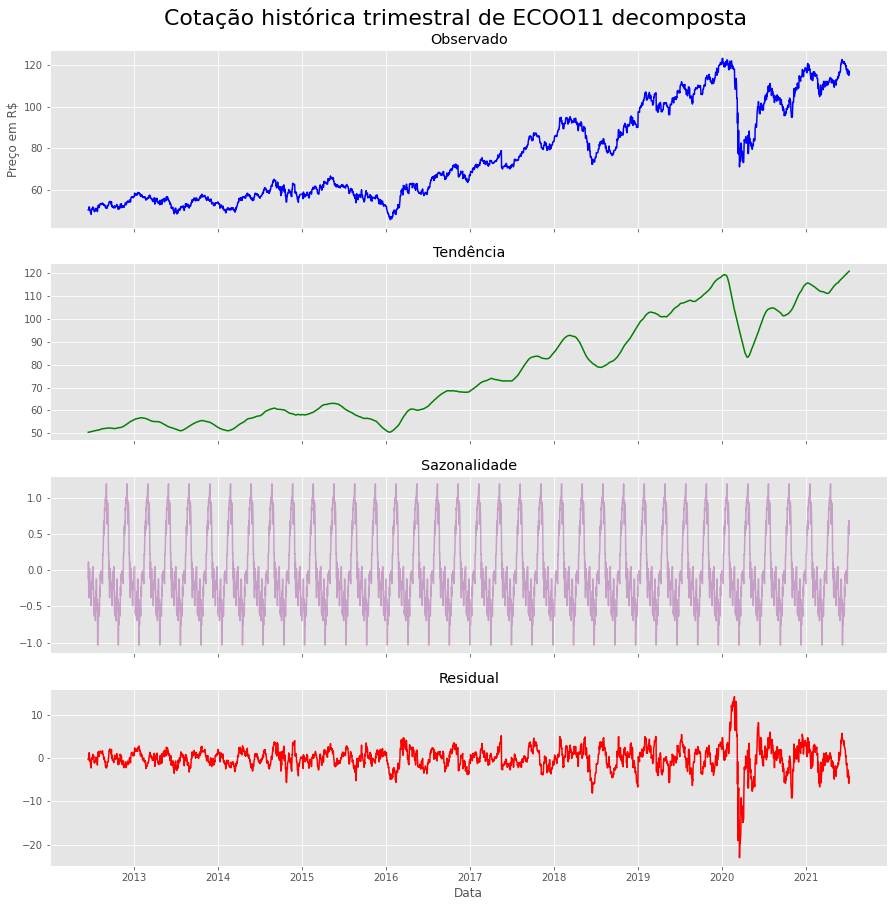

In [29]:
#decomposição period = trimestral
decomp_st(dados, 'date', 'close', 'additive', 30, 'Cotação histórica trimestral de ECOO11 decomposta', 90)

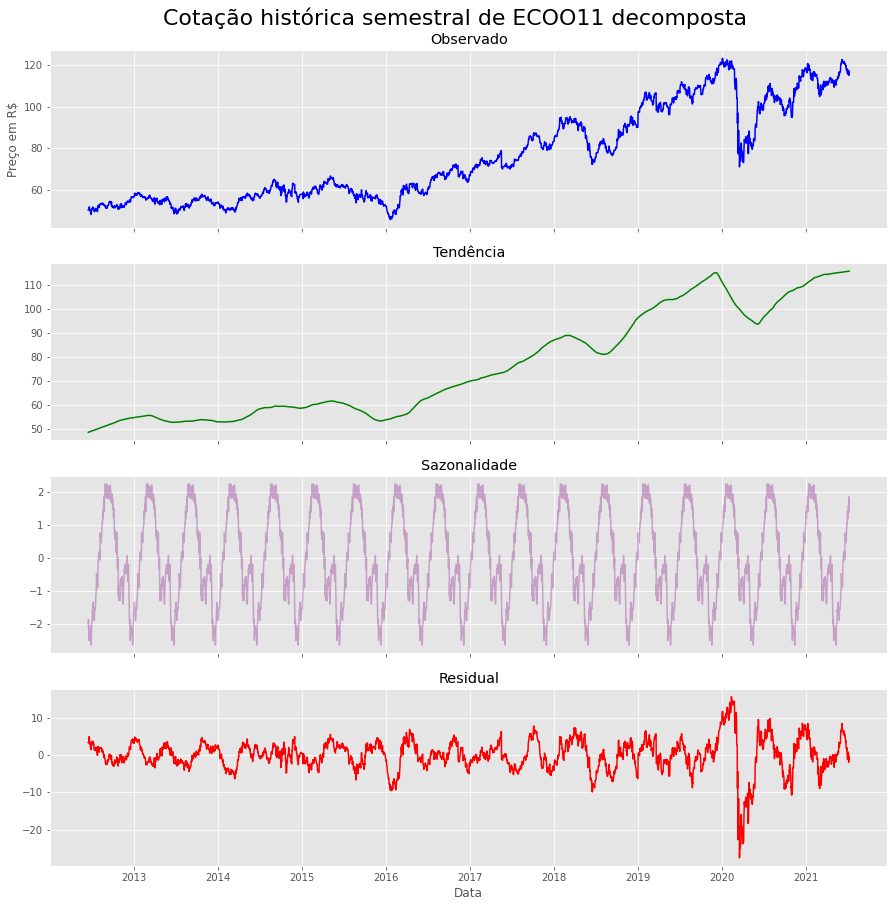

In [30]:
#decomposição period = semestral
decomp_st(dados, 'date', 'close', 'additive', 30, 'Cotação histórica semestral de ECOO11 decomposta', 180)

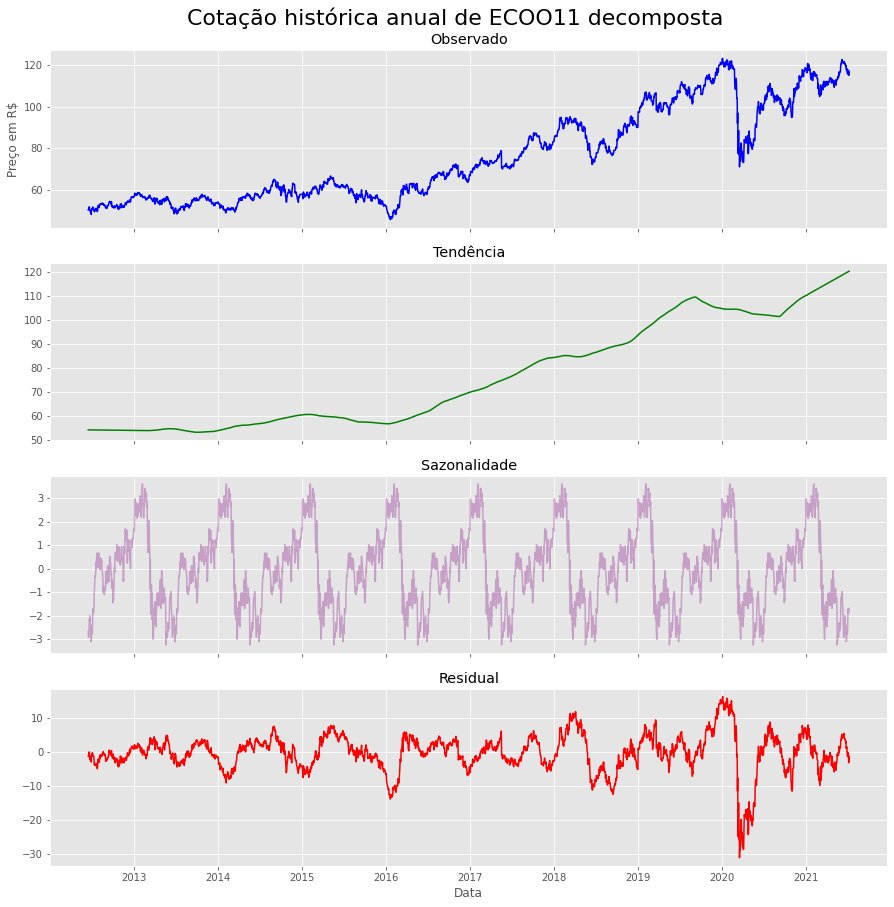

In [31]:
#decomposição period = anual
decomp_st(dados, 'date', 'close', 'additive', 30, 'Cotação histórica anual de ECOO11 decomposta', 365)

###Volume de transações de ECOO11

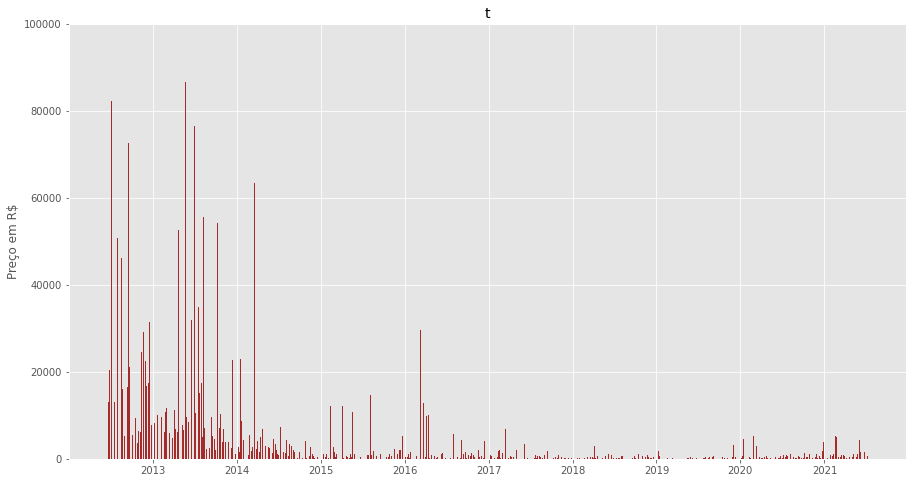

In [32]:
ax = plt.subplot()
ax.bar(dados['date'], dados['volume'], color='brown')
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('t')
plt.ylim(0,100000)
plt.show()

Um ponto de atenção no ativo é sua baixa liquidez, no gráfico vemos que o volume de transações diárias caiu bruscamente e vem se mantendo bastante baixa.

###Observando a média móvel do ativo

In [33]:
def media_movel(df: pd.DataFrame):
  df['mm7d'] = df['close'].rolling(window=7, center=False).mean()
  df['mm_anual'] = df['close'].rolling(window=246, center=False).mean()

In [34]:
media_movel(dados)
dados.head()

,date,open,high,low,close,volume,year,month,day,rentabilidade,mm7d,mm_anual
0,2012-06-15,50.01,50.27,49.00,50.21,307770,2012,6,15,NaN,NaN,NaN
1,2012-06-19,50.76,51.79,50.60,51.69,198900,2012,6,19,2.947620,NaN,NaN
2,2012-06-20,51.68,51.69,50.20,51.50,155510,2012,6,20,-0.367576,NaN,NaN
3,2012-06-21,50.60,51.21,50.07,50.07,83580,2012,6,21,-2.776699,NaN,NaN
4,2012-06-22,50.24,50.30,49.55,49.92,13170,2012,6,22,-0.299581,NaN,NaN


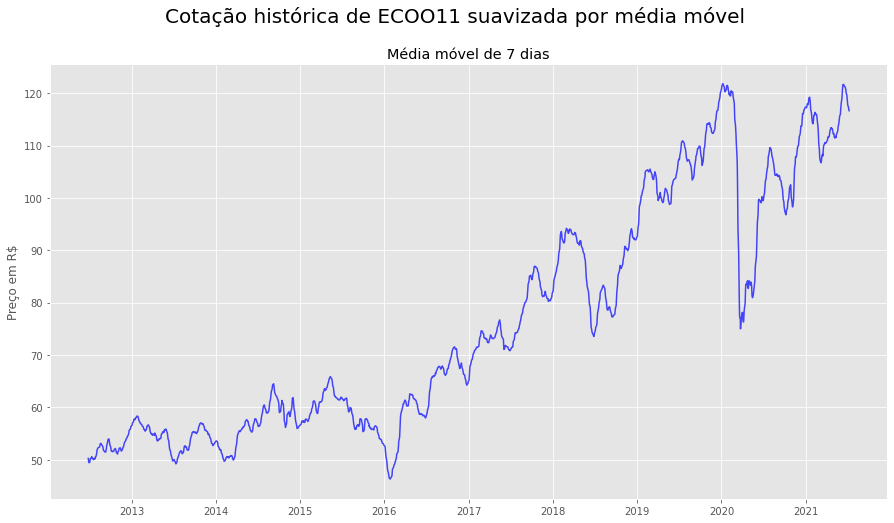

In [35]:
ax = sns.lineplot(data=dados, x='date', y='mm7d', color='blue', alpha=0.7)
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Média móvel de 7 dias')

plt.suptitle('Cotação histórica de ECOO11 suavizada por média móvel', fontsize=20)
plt.show()

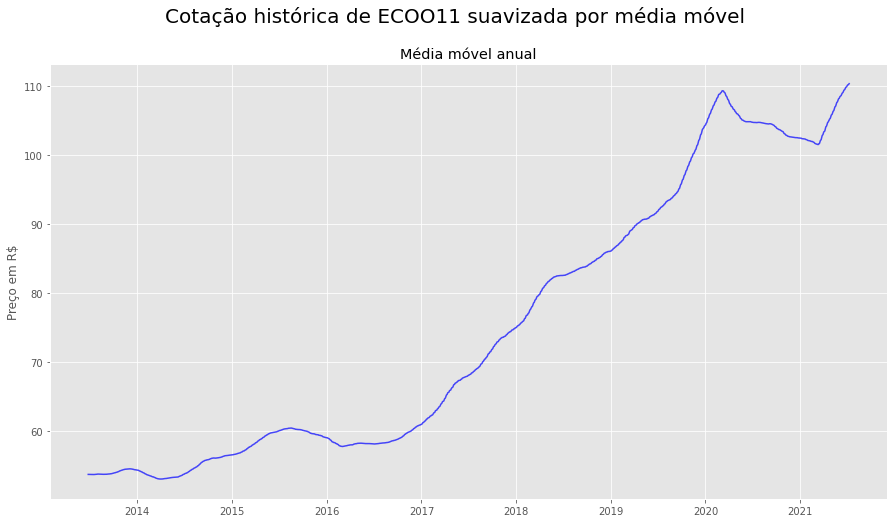

In [36]:
ax = sns.lineplot(data=dados, x='date', y='mm_anual', color='blue', alpha=0.7)
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Média móvel anual')

plt.suptitle('Cotação histórica de ECOO11 suavizada por média móvel', fontsize=20)
plt.show()

Algumas das nossas hipóteses começam a ser respondidas com a observação da tendência da série temporal e com a média móvel anual: o ativo se valorizou pouco antes de meio ambiente entrar definitivamente na pauta dos principais players e influenciadores do Sistema Internacional em meados de 2017 e dali em diante vem em franca valorização e crescimento nos preços.

###Sobre a rentabilidade do ativo

---
Pensamos que é interessante observar a rentabilidade do ativo para 4 períodos específicos:
- Até 2017;
- 2017 ao crash pandêmico;
- Pós-crash pandêmico;
- Período completo.

Para tal esforço utilizaremos a coluna rentabilidade que nada mais é que a divisão do preço em *t* em relação ao preço em *t-1* normalizada.


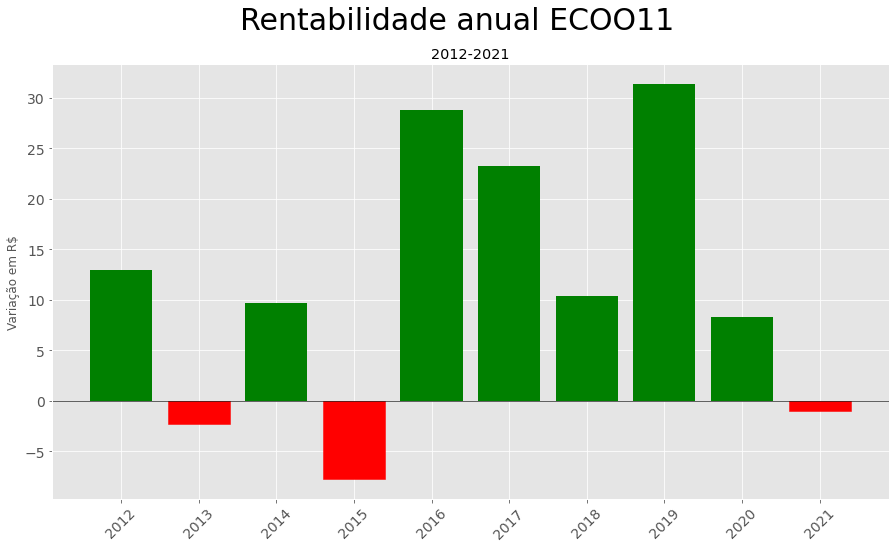

In [37]:
#período completo
fig, ax = plt.subplots()
rent_year = dados.groupby('year').agg({'rentabilidade':'sum'})
ax.bar(x=rent_year.index, height=rent_year['rentabilidade'], color='green')
#plotando em vermelho rentabilidade anual negativa
ax.get_children()[1].set_color('red')
ax.get_children()[3].set_color('red')
ax.get_children()[9].set_color('red')
ax.axhline(0, color='black', linewidth=0.6)
ax.set_xticks(ticks=rent_year.index)
ax.tick_params('x', rotation=45, labelsize=14)
ax.tick_params('y', labelsize=14)
ax.set_xlabel(None)
ax.set_ylabel('Variação em R$')
ax.set_title('2012-2021')
plt.suptitle('Rentabilidade anual ECOO11', fontsize=30)
plt.show()

A partir desse gráfico da rentabilidade podemos concluir sobre os 4 períodos:
- Até 2017 foi o período que o ativo menos rendeu tendo dois anos de rendimento negativos (2013 e 2015);
- 2017 ao crash pandêmico foi o período de maior rentabilidade do ativo;
- Pós-crash pandêmico, nesse período apesar o de ser aceleração mais rápida do ativo, no agregado do ano e da metade de 2021 a rentabilidade foi pouca.

Vale lembrar que essa rentabilidade é de Janeiro a Dezembro de cada ano e rentabilidade é variável para cada investidor, um exemplo, se houve posicionamento no ativo durante o crash pandêmico com os preços baixos até agora houve sim grande ganho de rentabilidade.

- De forma geral no período completo a rentabilidade do ativo foi boa tendo o mesmo ficado apenas 2 anos negativos (2021 ainda não foi finalizado).

Para termos melhor noção de como foi a rentabilidade no pós-crash pandêmico com a forte recuperação dos ativos devido ao [aumento de liquidez](https://www.imf.org/pt/News/Articles/2020/04/14/blog-gfsr-covid-19-crisis-poses-threat-to-financial-stability) promovidos pelos Bancos Centrais do mundo todo, vamos plotar o acumulado de 18-03-2020 até 08-07-2021.

In [38]:
close_8_2021 = dados[dados['date']=='2021-07-08']['close'].values
close_18_2020 = dados[dados['date']=='2020-03-18']['close'].values
rent_acumulada_2021 = ((close_8_2021/close_18_2020) * 100) - 100
rent_acumulada_2021

array([63.54416115])

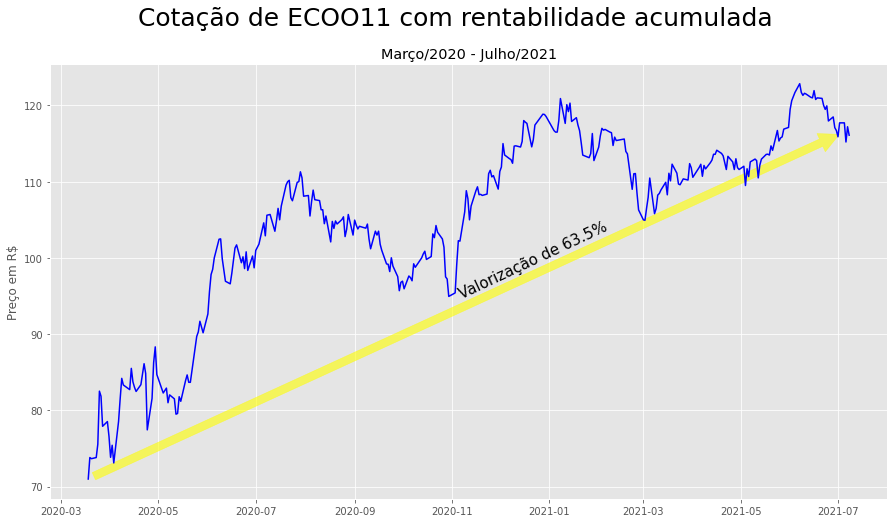

In [39]:
import matplotlib.patches as mpatches
ecoo_pos_pand = dados[dados['date'] >= '2020-03-18']
ax = plt.subplot()
ax.plot(ecoo_pos_pand['date'], ecoo_pos_pand['close'], color='blue')
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Março/2020 - Julho/2021')
arrow = mpatches.FancyArrowPatch((0.05, 0.05), (0.945,0.84),
                                 mutation_scale=40,
                                 transform=ax.transAxes, color='yellow', alpha=0.6)
ax.add_patch(arrow)
ax.text(0.485,0.462, 'Valorização de 63.5%', transform=ax.transAxes, rotation=25.2, fontsize=15) #o parâmetro transform=ax.transAxes faz o método text compreender eixos não númericos
plt.suptitle('Cotação de ECOO11 com rentabilidade acumulada', fontsize=25)
plt.show()

Como citamos acima, a janela de tempo de posicionamento dos ativos e seu preço importa. Observando o gráfico vemos uma valorização de 63.5% entre Março de 2020 e Julho de 2021.

Vamos agora observar a rentabilidade acumulada no período pré-pandemia.

In [40]:
ecoo_pre_pand = dados[dados['date'] <= '2020-03-01']
close_06_2012 = ecoo_pre_pand[ecoo_pre_pand['date']=='2012-06-15']['close'].values
close_03_2020 = ecoo_pre_pand[ecoo_pre_pand['date']=='2020-02-28']['close'].values
rent_acumulada_2020 = ((close_03_2020/close_06_2012) * 100) - 100
rent_acumulada_2020

array([116.23182633])

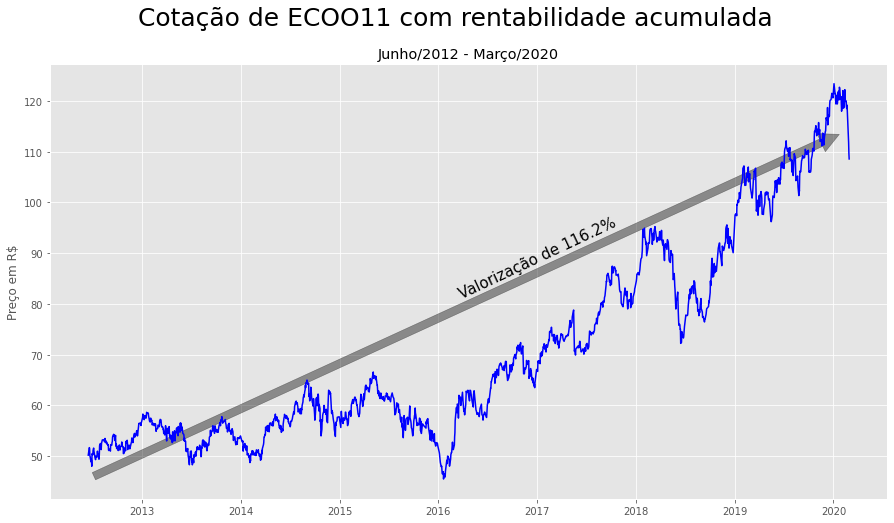

In [41]:
ax = plt.subplot()
ax.plot(ecoo_pre_pand['date'], ecoo_pre_pand['close'], color='blue')
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Junho/2012 - Março/2020')
arrow = mpatches.FancyArrowPatch((0.05, 0.05), (0.945,0.84),
                                 mutation_scale=40,
                                 transform=ax.transAxes, color='black', alpha=0.4)
ax.add_patch(arrow)
ax.text(0.485,0.462, 'Valorização de 116.2%', transform=ax.transAxes, rotation=25.2, fontsize=15) #o parâmetro transform=ax.transAxes faz o método text compreender eixos não númericos
plt.suptitle('Cotação de ECOO11 com rentabilidade acumulada', fontsize=25)
plt.show()

No período pré-pandemia o ativo teve uma rentabilidade acumulada de 116.2%, uma média de 14.5% ao ano, apesar de ser menor do que a valorização pós-pandemia, ainda assim foi uma valorização boa para aqueles que se posicionaram desde o início das negociações.

Rentabilidade acumulada durante todo o período

In [42]:
inicio_ecoo = dados[dados['date']=='2012-06-15']['close'].values
fim_ecoo = dados[dados['date']=='2021-07-08']['close'].values
rent_all = ((fim_ecoo/inicio_ecoo) * 100) - 100 
rent_all

array([131.22883888])

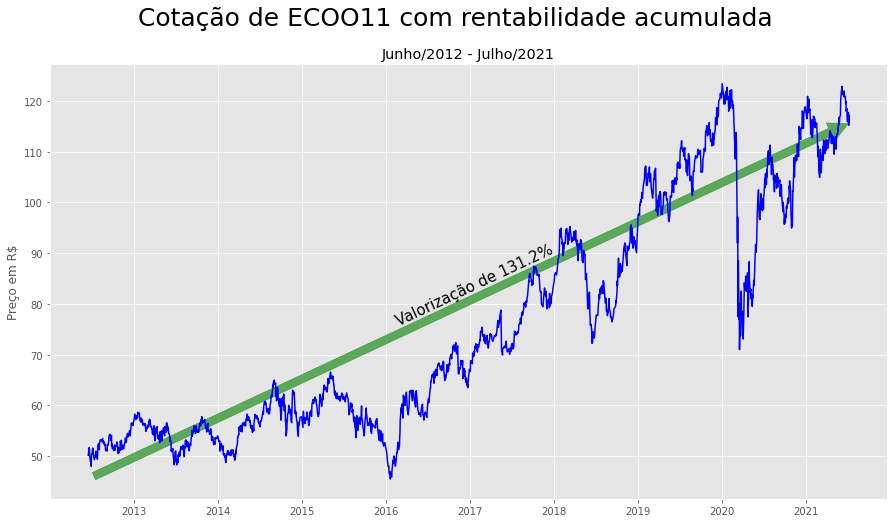

In [43]:
ax = plt.subplot()
ax.plot(dados['date'], dados['close'], color='blue')
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Junho/2012 - Julho/2021')
arrow = mpatches.FancyArrowPatch((0.05, 0.05), (0.956,0.865),
                                 mutation_scale=40,
                                 transform=ax.transAxes, color='green', alpha=0.6)
ax.add_patch(arrow)
ax.text(0.41,0.4, 'Valorização de 131.2%', transform=ax.transAxes, rotation=25.2, fontsize=15) #o parâmetro transform=ax.transAxes faz o método text compreender eixos não númericos
plt.suptitle('Cotação de ECOO11 com rentabilidade acumulada', fontsize=25)
plt.show()

No acumulado total temos portanto a maior rentabilidade de 131.2% mostrando a importância do longo prazo e como esse ativo se valorizou e ganhou relevância ao longo do tempo.

Conclusões sobre ECOO11:

---
Nesta seção analisamos o ETF ECOO11, objeto principal desta análise, passando desde seu crescimento, changepoints e reações à pandemia, até uma observação mais cuidadosa de sua rentabilidade acumulada ao longo do tempo e em diferentes janelas.

Observamos através da média móvel que o ativo se valorizou bastante a partir de 2017 quando a agenda meio ambiente é reforçada. Sofreu como todos os ativos com o crash pandêmico mas vem tendo forte recuperação.

Finalmente, analisamos que a rentabilidade em diversos períodos foi positivas para os agentes posicionados no ativo.


#Analisando BOVA11 para comparação

---
Nesta seção vamos realizar uma análise do ETF BOVA11 que segue o principal benchmark da Bolsa brasileira que é o índice IBOVESPA. 

Vamos analisar a valorização do ativo, sua rentabilidade acumulada e sua rentabilidade no pós-pandemia. Para depois podermos confrontá-lo com ECOO11.


In [44]:
bova = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/ecoo11_analysis/BOVA11_google_finance%20-%20IBOV.csv', decimal=',')
bova.head()

,Date,Open,High,Low,Close,Volume
0,15/06/2012 16:56:00,54.80,55.29,54.42,55.29,3151680
1,19/06/2012 16:56:00,55.85,56.73,55.40,56.40,3759910
2,20/06/2012 16:56:00,56.40,56.76,55.65,56.36,5550260
3,21/06/2012 16:56:00,56.36,56.86,54.60,54.71,2050680
4,22/06/2012 16:56:00,54.91,55.17,54.25,54.60,1805320


In [45]:
bova['Date'] = pd.to_datetime(bova['Date'], yearfirst=True, format='%d/%m/%Y', exact=False)
bova.columns = bova.columns.str.lower()

In [46]:
bova.head()

,date,open,high,low,close,volume
0,2012-06-15,54.80,55.29,54.42,55.29,3151680
1,2012-06-19,55.85,56.73,55.40,56.40,3759910
2,2012-06-20,56.40,56.76,55.65,56.36,5550260
3,2012-06-21,56.36,56.86,54.60,54.71,2050680
4,2012-06-22,54.91,55.17,54.25,54.60,1805320


In [47]:
feature_prod(bova)
bova.head()

,date,open,high,low,close,volume,year,month,day,rentabilidade
0,2012-06-15,54.80,55.29,54.42,55.29,3151680,2012,6,15,NaN
1,2012-06-19,55.85,56.73,55.40,56.40,3759910,2012,6,19,2.007596
2,2012-06-20,56.40,56.76,55.65,56.36,5550260,2012,6,20,-0.070922
3,2012-06-21,56.36,56.86,54.60,54.71,2050680,2012,6,21,-2.927608
4,2012-06-22,54.91,55.17,54.25,54.60,1805320,2012,6,22,-0.201060


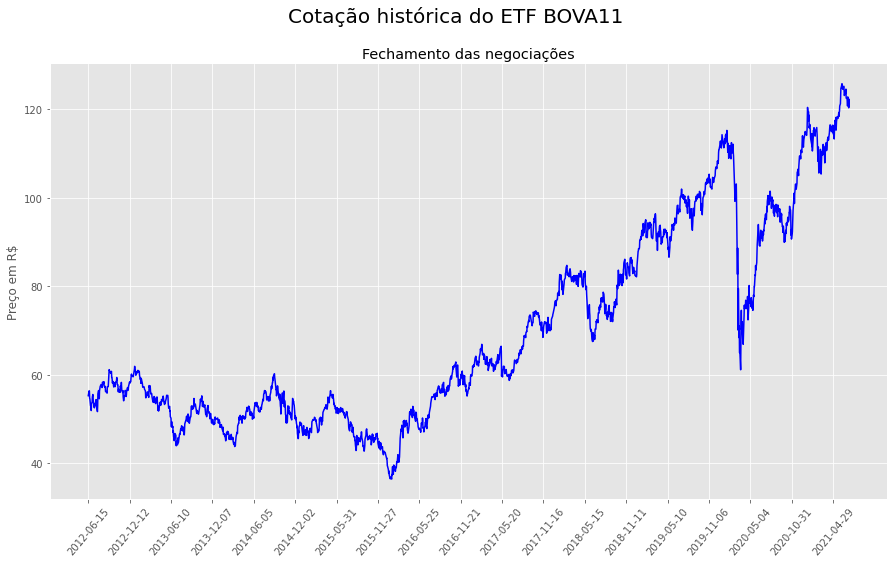

In [48]:
ax = sns.lineplot(data=bova, x='date', y='close', color='blue')
ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Fechamento das negociações')
ax.xaxis.set_major_locator(ticker.IndexLocator(base=180, offset=0))
ax.tick_params('x', rotation=50)
sns.despine()
plt.suptitle('Cotação histórica do ETF BOVA11', fontsize=20)
plt.show()

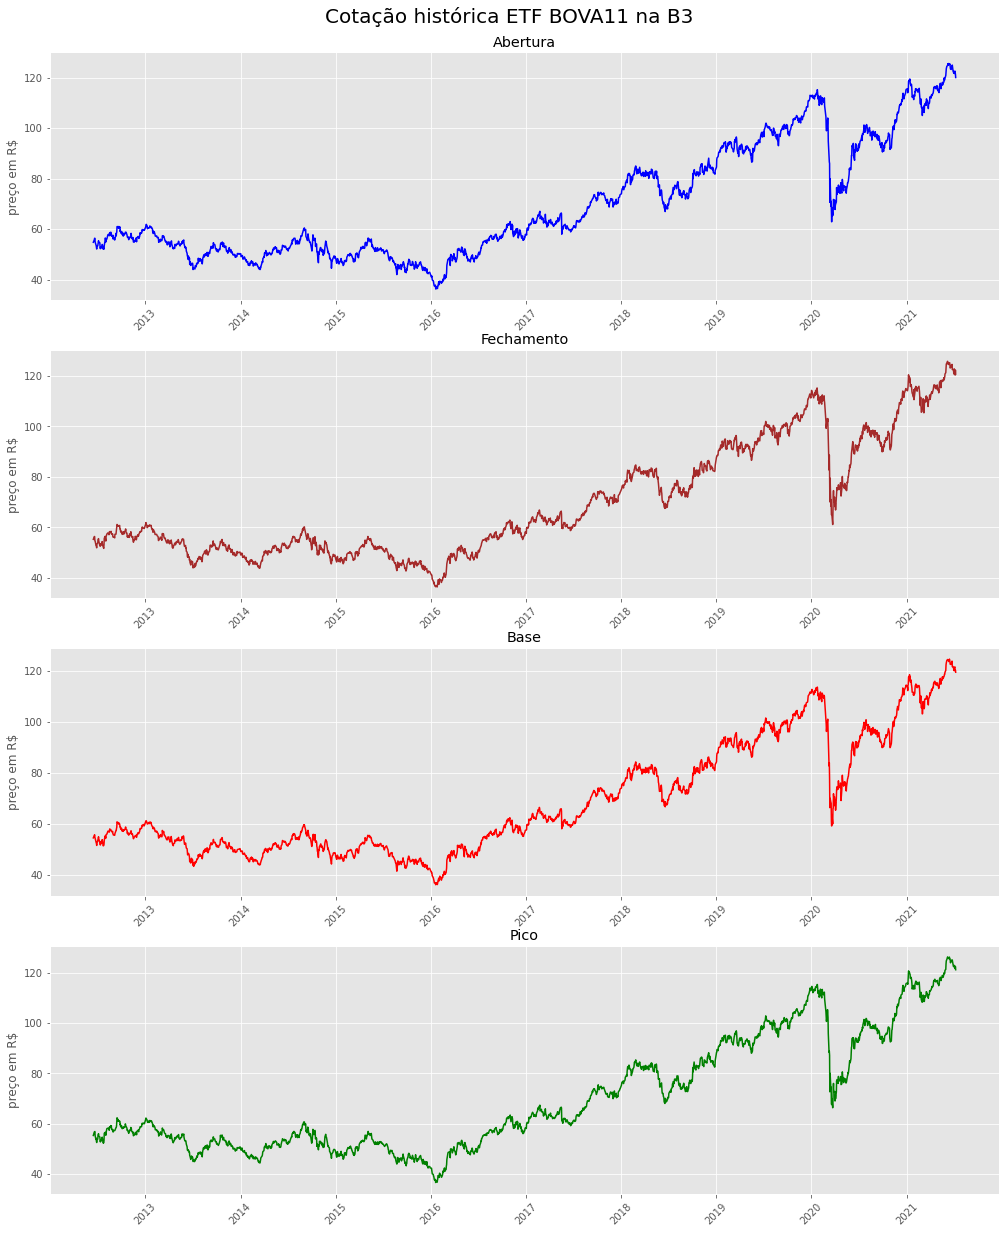

In [49]:
fig, axs = plt.subplots(4,1, figsize=(17,21))

sns.lineplot(data=bova, x='date', y='open', ax=axs[0], color='blue')
axs[0].set_title('Abertura')
axs[0].set_xlabel(None)
axs[0].set_ylabel('preço em R$')
axs[0].tick_params('x', labelrotation=45,)

sns.lineplot(data=bova, x='date', y='close', ax=axs[1], color='brown')
axs[1].set_title('Fechamento')
axs[1].set_xlabel(None)
axs[1].set_ylabel('preço em R$')
axs[1].tick_params('x', labelrotation=45)

sns.lineplot(data=bova, x='date', y='low', ax=axs[2], color='red')
axs[2].set_title('Base')
axs[2].set_xlabel(None)
axs[2].set_ylabel('preço em R$')
axs[2].tick_params('x', labelrotation=45)

sns.lineplot(data=bova, x='date', y='high', ax=axs[3], color='green')
axs[3].set_title('Pico')
axs[3].set_xlabel(None)
axs[3].set_ylabel('preço em R$')
axs[3].tick_params('x', labelrotation=45)

plt.suptitle('Cotação histórica ETF BOVA11 na B3', y=0.91, fontsize=20)
plt.show()

A olho nu, BOVA11 também parece ter tido boa valorização ao longo do tempo e no pós-pandemia, vamos observar isso agora com a trajetória da média móvel e com a rentabilidade acumulada.

###Rentabilidade de BOVA11

In [50]:
media_movel(bova)
bova.head(10)

,date,open,high,low,close,volume,year,month,day,rentabilidade,mm7d,mm_anual
0,2012-06-15,54.80,55.29,54.42,55.29,3151680,2012,6,15,NaN,NaN,NaN
1,2012-06-19,55.85,56.73,55.40,56.40,3759910,2012,6,19,2.007596,NaN,NaN
2,2012-06-20,56.40,56.76,55.65,56.36,5550260,2012,6,20,-0.070922,NaN,NaN
3,2012-06-21,56.36,56.86,54.60,54.71,2050680,2012,6,21,-2.927608,NaN,NaN
4,2012-06-22,54.91,55.17,54.25,54.60,1805320,2012,6,22,-0.201060,NaN,NaN
5,2012-06-25,53.72,53.72,52.90,53.01,1457150,2012,6,25,-2.912088,NaN,NaN
6,2012-06-26,53.49,54.20,52.55,53.00,1336320,2012,6,26,-0.018864,54.767143,NaN
7,2012-06-27,52.70,52.95,52.21,52.28,1895450,2012,6,27,-1.358491,54.337143,NaN
8,2012-06-28,52.13,52.49,51.45,51.93,1626120,2012,6,28,-0.669472,53.698571,NaN
9,2012-06-29,53.39,53.50,52.95,53.42,1127340,2012,6,29,2.869247,53.278571,NaN


In [51]:
def def_eixos(axs: vars, xlabel: str, ylabel: str, title: str, suptitle: str):
  """Função que plota os nomes do eixos de forma eficiente e rápida
  Utilizada com 'ax' como plt.subplot ou subplots """
  import matplotlib.pyplot as plt
  axs.set_xlabel(xlabel)
  axs.set_ylabel(ylabel)
  axs.set_title(title)
  plt.suptitle(suptitle, fontsize=20)

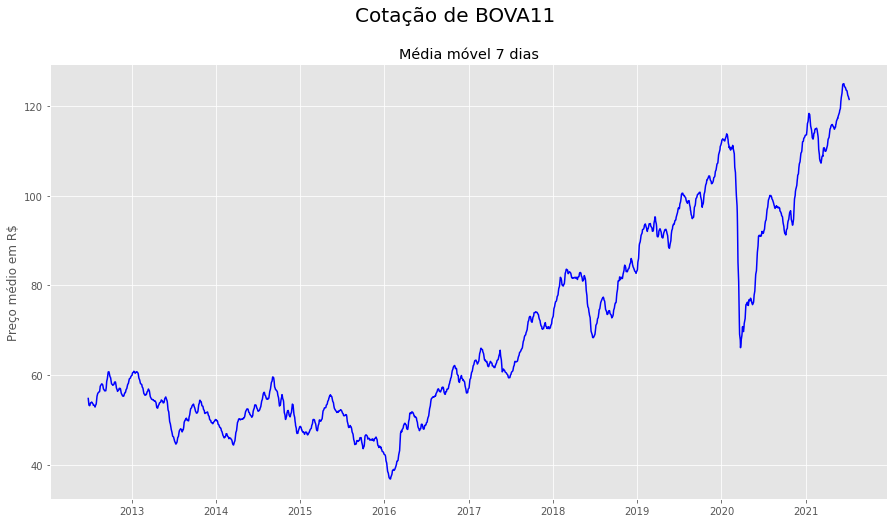

In [52]:
#média móvel 7 dias
ax = plt.subplot()
sns.lineplot(ax=ax, data=bova, x='date', y='mm7d', color='blue')
def_eixos(axs=ax, xlabel=None, ylabel='Preço médio em R$', title='Média móvel 7 dias', suptitle='Cotação de BOVA11')

plt.show()

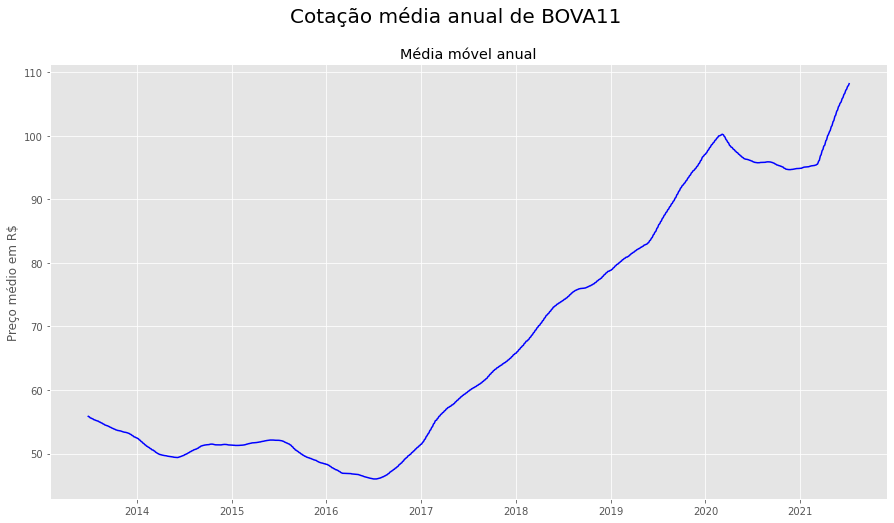

In [53]:
#Média móvel anual
ax = plt.subplot()
sns.lineplot(ax=ax, data=bova, x='date', y='mm_anual', color='blue')
def_eixos(axs=ax, xlabel=None, ylabel='Preço médio em R$', title='Média móvel anual', suptitle='Cotação média anual de BOVA11')

plt.show()

Assim como com ECOO11, BOVA11 também segue um padrão de crescimento a partir de 2017 e de queda com a pandemia e recuperação posterior.

In [54]:
#rentabilidade janela pré-pandemia
bova_pre_pand = bova[bova['date'] <= '2020-02-28']
bova_close_mar_2020 = bova_pre_pand[bova_pre_pand['date'] == '2020-02-28']['close'].values
bova_close_jun_2012 = bova_pre_pand[bova_pre_pand['date'] == '2012-06-15']['close'].values
rent_pre_pand_bova = ((bova_close_mar_2020/bova_close_jun_2012)*100) - 100
rent_pre_pand_bova

array([81.94971966])

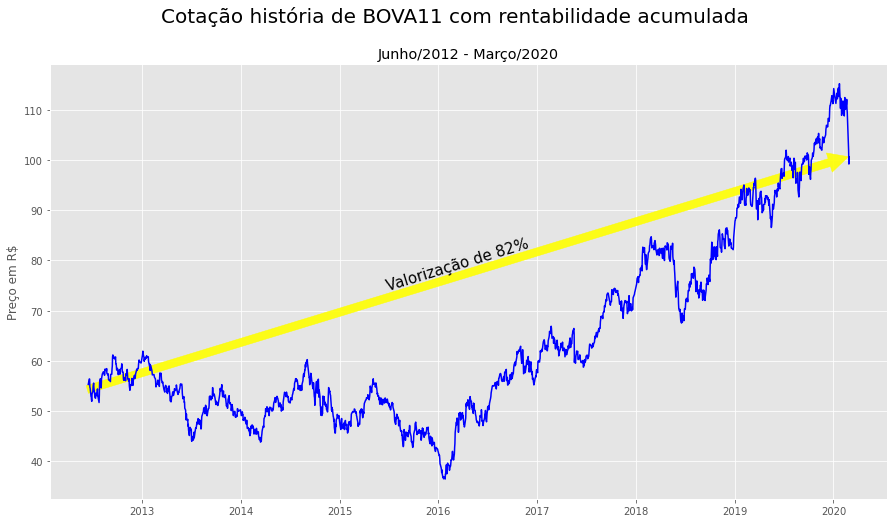

In [55]:
ax = plt.subplot()
ax.plot(bova_pre_pand['date'], bova_pre_pand['close'], color='blue')
def_eixos(axs=ax, xlabel=None, ylabel='Preço em R$', title='Junho/2012 - Março/2020', suptitle='Cotação história de BOVA11 com rentabilidade acumulada')
arrow = mpatches.FancyArrowPatch((0.042, 0.25), (0.956,0.788),
                                 mutation_scale=40,
                                 transform=ax.transAxes, color='yellow', alpha=0.9)
ax.add_patch(arrow)
ax.text(0.4,0.48, 'Valorização de 82%', transform=ax.transAxes, rotation=17, fontsize=15)
plt.show()

In [56]:
#rentabilidade janela pós-pandemia
bova_pos_pand = bova[bova['date'] >= '2020-03-18']
bova_close_mar_20202 = bova_pos_pand[bova_pos_pand['date'] == '2020-03-18']['close'].values
bova_close_jul_2021 = bova_pos_pand[bova_pos_pand['date'] == '2021-07-08']['close'].values
rent_pos_pand_bova = ((bova_close_jul_2021/bova_close_mar_20202)*100) - 100
rent_pos_pand_bova

array([85.60221504])

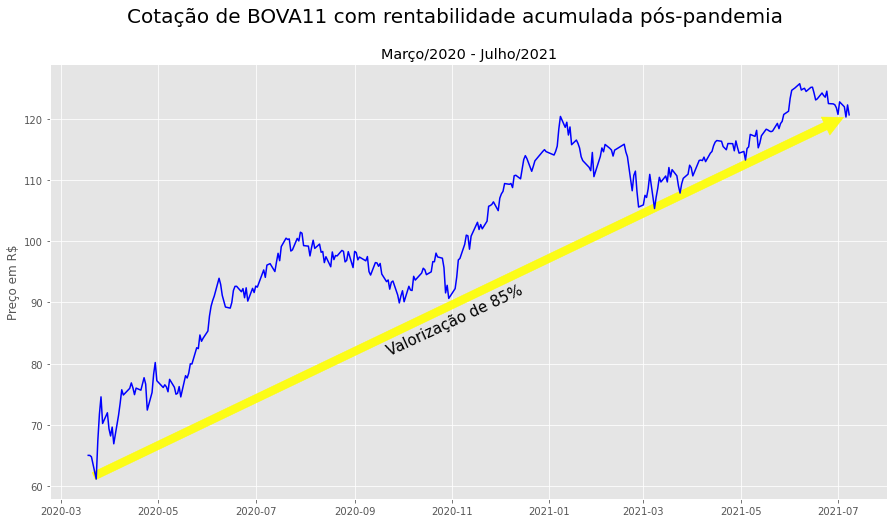

In [57]:
ax = plt.subplot()
ax.plot(bova_pos_pand['date'], bova_pos_pand['close'], color='blue')
def_eixos(axs=ax, xlabel=None, ylabel='Preço em R$', title='Março/2020 - Julho/2021', suptitle='Cotação de BOVA11 com rentabilidade acumulada pós-pandemia')
arrow = mpatches.FancyArrowPatch((0.05, 0.05), (0.95,0.879),
                                 mutation_scale=40,
                                 transform=ax.transAxes, color='yellow', alpha=0.9)
ax.add_patch(arrow)
ax.text(0.4,0.33, 'Valorização de 85%', transform=ax.transAxes, rotation=25, fontsize=15)
plt.show()

In [58]:
#rentabilidade total
rent_total_bova = ((bova[bova['date'] == '2021-07-08']['close'].values / bova[bova['date'] == '2012-06-15']['close'].values)*100) - 100
rent_total_bova

array([118.23114487])

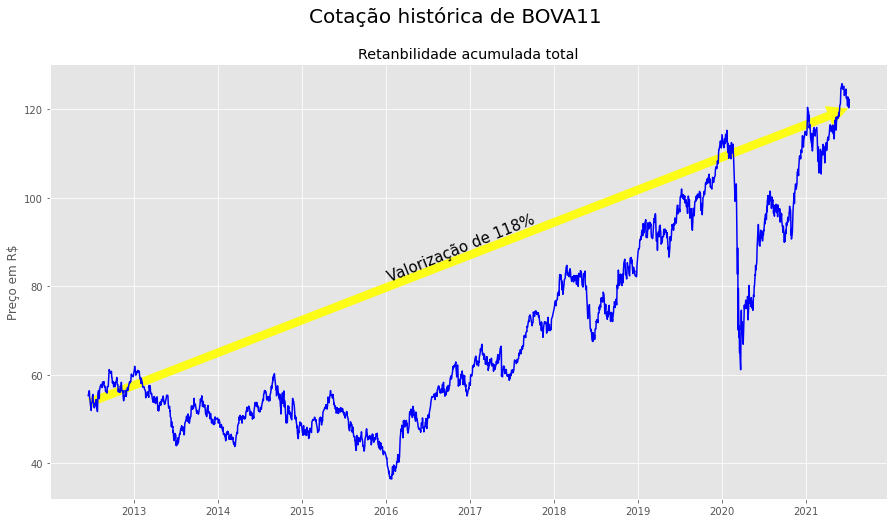

In [59]:
ax = plt.subplot()
ax.plot(bova['date'], bova['close'], color='blue')
def_eixos(axs=ax, xlabel=None, ylabel='Preço em R$', title='Retanbilidade acumulada total', suptitle='Cotação histórica de BOVA11')
arrow = mpatches.FancyArrowPatch((0.045, 0.22), (0.955,0.899),
                                 mutation_scale=40,
                                 transform=ax.transAxes, color='yellow', alpha=0.9)
ax.add_patch(arrow)
ax.text(0.4,0.5, 'Valorização de 118%', transform=ax.transAxes, rotation=22, fontsize=15)
plt.show()

Com as rentabilidades plotadas chegamos a uma primeira conclusão definitiva: em relação ao BOVA11, ECOO11 teve maior rentabilidade em todos os períodos exceto no pós-pandemia quando o BOVA11 rendeu 85% contra 63.5% de ECOO11.

### **Portanto, numa janela de tempo desde o início das negociações de ECOO11, um ativo pautado em princípios ESG rendeu mais que o principal benchmark de fundos de ações da Bolsa Brasileira - IBOVESPA medido pelo desempenho do ETF BOVA11.**

#Comparações de desempenho ECOO11, BOVA11 e Oil WTI

---
Nesta seção iremos comparar as correlações de alta e baixa entre os ativos e seu desempenho histórico comparado.


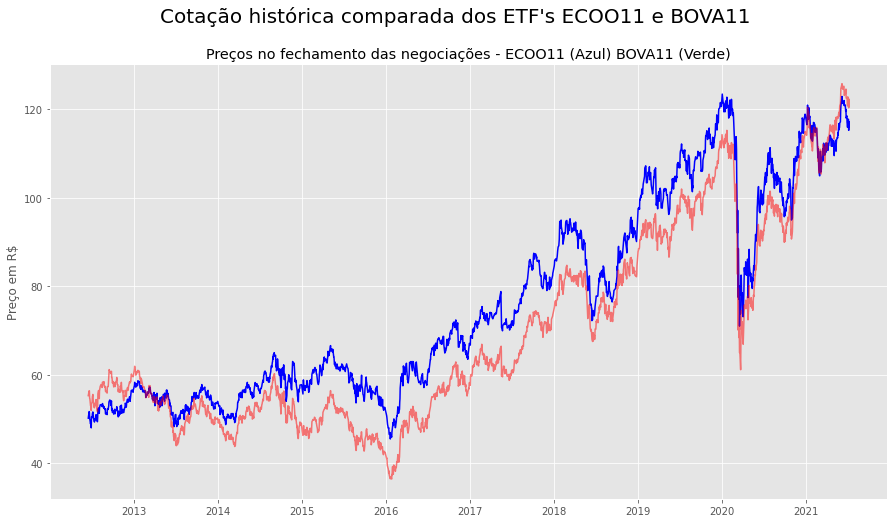

In [60]:
ax = sns.lineplot(x=dados['date'], y=dados['close'], color='blue')

sns.lineplot(x=bova['date'], y=bova['close'], color='red', alpha=0.5)

ax.set_xlabel(None)
ax.set_ylabel('Preço em R$')
ax.set_title('Preços no fechamento das negociações - ECOO11 (Azul) BOVA11 (Verde)')
plt.suptitle("Cotação histórica comparada dos ETF's ECOO11 e BOVA11", fontsize=20)


plt.show()

###Nossa proposta agora é comparar os preços de ECOO11, BOVA11 e do contrato futuro de petróleo na Bolsa brasileira e tentarmos entender a questão: **Os ativos ESG realmente proporcionam maior retorno do que os ativos não-ESG ou que não se baseiam nos seus princípios para constituir o ativo?**

Os preços do petróleo na Bolsa brasileira são cotados em dólar, portanto iremos transformar todos os valores em real a partir da cotação do dia 30/06/2021 e corrigir todos os valores de petróleo, BOVA11 e ECOO11 para um valor presente.

---
Fontes e referências dos valores:

- Petróleo WTI - Google Finance;

- Cotação dólar 30/06/2021 - [Economia UOL](https://economia.uol.com.br/cotacoes/noticias/redacao/2021/06/30/fechamento-dolar-ibovespa-30-junho.htm);

- Correção dos preços - [Calculadora do cidadão BCB](https://www3.bcb.gov.br/CALCIDADAO/publico/corrigirPorIndice.do?method=corrigirPorIndice) com base no IPCA.


###Convertendo os preços para Real R$

In [61]:
#cotação do dólar em 30/06 - 4,97
dolar_30_06 = 4.97
oil_wti = pd.read_csv('https://raw.githubusercontent.com/EnzoGolfetti/praticas_python/main/ecoo11_analysis/WTI_google_finance%20-%20WTI.csv', decimal=',')
oil_wti.head()

,Date,Open,High,Low,Close,Volume
0,15/06/2012 16:00:00,14.22,14.37,14.03,14.35,1645374
1,18/06/2012 16:00:00,14.11,14.30,14.01,14.14,840268
2,19/06/2012 16:00:00,14.30,14.66,14.10,14.31,1078922
3,20/06/2012 16:00:00,14.29,14.39,13.92,14.14,1154742
4,21/06/2012 16:00:00,14.15,14.21,13.23,13.31,1563689


In [62]:
#conversão para real
oil_wti.loc[:, ['Open',	'High',	'Low',	'Close']] = oil_wti.loc[:, ['Open',	'High',	'Low',	'Close']] * dolar_30_06

In [63]:
oil_wti.head()

,Date,Open,High,Low,Close,Volume
0,15/06/2012 16:00:00,70.6734,71.4189,69.7291,71.3195,1645374
1,18/06/2012 16:00:00,70.1267,71.0710,69.6297,70.2758,840268
2,19/06/2012 16:00:00,71.0710,72.8602,70.0770,71.1207,1078922
3,20/06/2012 16:00:00,71.0213,71.5183,69.1824,70.2758,1154742
4,21/06/2012 16:00:00,70.3255,70.6237,65.7531,66.1507,1563689


In [64]:
oil_wti['Date'] = pd.to_datetime(oil_wti['Date'], yearfirst=True, format='%d/%m/%Y', exact=False)
oil_wti.columns = oil_wti.columns.str.lower()

In [65]:
feature_prod(oil_wti)
oil_wti.head() 

,date,open,high,low,close,volume,year,month,day,rentabilidade
0,2012-06-15,70.6734,71.4189,69.7291,71.3195,1645374,2012,6,15,NaN
1,2012-06-18,70.1267,71.0710,69.6297,70.2758,840268,2012,6,18,-1.463415
2,2012-06-19,71.0710,72.8602,70.0770,71.1207,1078922,2012,6,19,1.202263
3,2012-06-20,71.0213,71.5183,69.1824,70.2758,1154742,2012,6,20,-1.187980
4,2012-06-21,70.3255,70.6237,65.7531,66.1507,1563689,2012,6,21,-5.869873


In [66]:
#rentabilidade total acumulada
((oil_wti[oil_wti['date']=='2021-07-08']['close'].values / oil_wti[oil_wti['date']=='2012-06-15']['close'].values)*100) - 100

array([-69.26829268])

###Corrigindo os preços para o valor presente

---
Uma rápida consulta na Calculadora do Cidadão no BCB mostra que no período de 06/2012 a 06/2021 houve crescimento da ordem de 65% nos preços

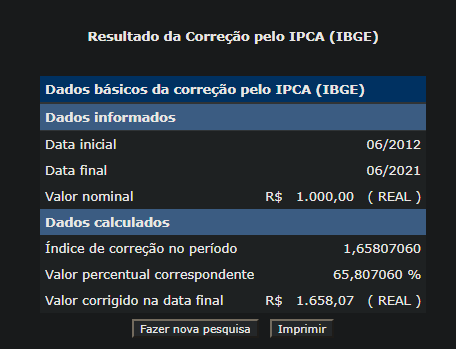

Portanto iremos aplicar tal correção a todos os preços das cotações dos ativos que estamos avaliando.


In [67]:
#aplicando a correção pelo IPCA
dados.loc[:, ['open',	'high',	'low',	'close']] = dados.loc[:, ['open',	'high',	'low',	'close']] * 1.65
bova.loc[:, ['open',	'high',	'low',	'close']] = bova.loc[:, ['open',	'high',	'low',	'close']] * 1.65
oil_wti.loc[:, ['open',	'high',	'low',	'close']] = oil_wti.loc[:, ['open',	'high',	'low',	'close']] * 1.65

###Hora de observar os preços e ver seu desempenho ao longo do tempo

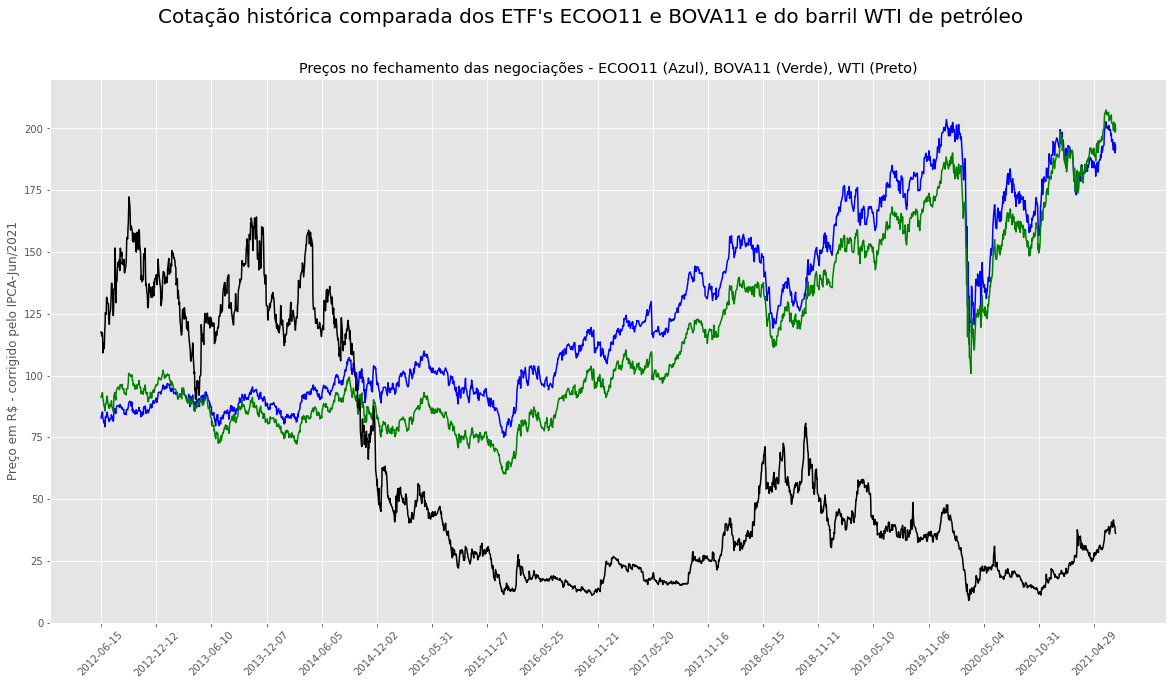

In [68]:
fig, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(dados['date'], dados['close'], color='blue')
ax.plot(bova['date'], bova['close'], color='green')
ax.plot(oil_wti['date'], oil_wti['close'], color='black')

plt.tick_params('x', labelrotation=45)
plt.ylim(0,220)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=180, offset=0))

ax.set_xlabel(None)
ax.set_ylabel('Preço em R$ - corrigido pelo IPCA-Jun/2021')
ax.set_title('Preços no fechamento das negociações - ECOO11 (Azul), BOVA11 (Verde), WTI (Preto)')
plt.suptitle("Cotação histórica comparada dos ETF's ECOO11 e BOVA11 e do barril WTI de petróleo", fontsize=20)

plt.show()

Historicamente, observando do ínicio das negociações de ECOO11 (que também é o ativo 'mais novo'), podemos ver que numa estratégia simples de *buy 'n hold*, ou seja, comprar os ativos em determinada data e vendê-los em determinada data no **longo prazo** tais ativos atrelados a ESG renderiam mais comparados ao petróleo (com rentabilidade no período de **-69.2%**) - um dos maiores poluentes do mundo - e o BOVA11 que contempla as maiores empresas do Brasil seguindo princípios de ESG ou não.

O petróleo é o ativo que mais sofreu no período, não só por diminuição no lado da demanda, mas também aumento no lado da oferta, com maiores ofertas de produtores tradicionais como Rússia e EUA e fortificação de alguns *players* como a Arábia Saudita com sua SaudiAramco que fez o maior IPO do mundo em 2019.

###Correlações dos ativos

In [69]:
dados['nome'] = 'ECOO11'
bova['nome'] = 'BOVA11'
oil_wti['nome'] = 'WTI'
dfs = [dados, bova, oil_wti]

In [70]:
#DataFrame para analisar a correlação
correlacao_ativos = pd.DataFrame()
for df in dfs:
  correlacao_ativos[df['nome'].iloc[0]] = df['rentabilidade']

In [71]:
correlacao_ativos.head()

,ECOO11,BOVA11,WTI
0,NaN,NaN,NaN
1,2.947620,2.007596,-1.463415
2,-0.367576,-0.070922,1.202263
3,-2.776699,-2.927608,-1.187980
4,-0.299581,-0.201060,-5.869873


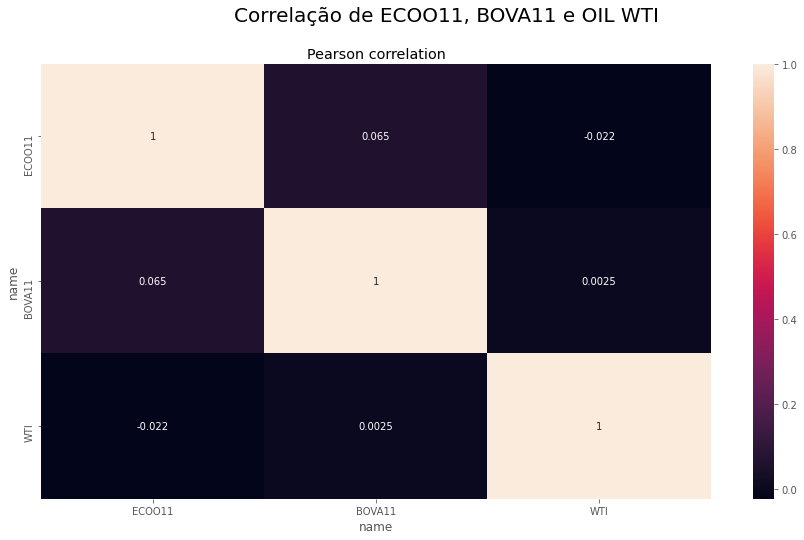

In [72]:
ax = plt.subplot()
sns.heatmap(ax=ax, data=correlacao_ativos.corr(), annot=True)
def_eixos(axs=ax, xlabel='name', ylabel='name', title='Pearson correlation', suptitle='Correlação de ECOO11, BOVA11 e OIL WTI')
plt.show()

A partir da matriz de correlações podemos identificar que os três ativos estão descorrelacionados, indicando diferentes trajetórias, e como esperado, ECOO11 e OIL WTI tem uma correlação negativa, reforçando a ideia de Environmental do ativo.

#Prevendo preços com Facebook Prophet

---
Com as principais análises da rentabilidade de ECOO11, suas valorizações e desvalorizações, junto a comparações com benchmarks como IBOVESPA e petróleo WTI, vamos para a seção final dessa análise, com a aplicação da biblioteca de Machine Learning Prophet do Facebook construída para a previsão de séries temporais de forma eficiente e robusta.

Links sobre previsões de séries temporais com o Prophet:

- [Forecasting stock prices using Prophet](https://towardsdatascience.com/forecasting-stock-prices-using-prophet-652b31fb564e);
- [StockPricePrediction (notebook do artigo acima)](https://github.com/NGYB/Stocks/blob/master/StockPricePrediction_fh21/StockPricePrediction_v2_prophet.ipynb); 
- [Documentação do Facebook Prophet](https://facebook.github.io/prophet/);
- [Predicting Google's stock prices using Facebook Prophet](https://medium.com/mlearning-ai/predicting-googles-stock-prices-using-facebook-s-prophet-4829c83a8590); 

In [73]:
from fbprophet import Prophet

Primeiro vamos seguir um padrão na área de Machine Learning de separar o dataframe em treino e teste

In [203]:
ecoo11 = dados.loc[:, ['date', 'close']]
ecoo11_train = ecoo11.iloc[:1981, :]
ecoo11_test = ecoo11.iloc[1981:, :]
ecoo11_train.columns = ['ds','y']
ecoo11_test.columns = ['ds','y']

In [208]:
model = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.01, daily_seasonality=True)

In [209]:
model.fit(ecoo11_train)

In [215]:
ecoo_futuro = model.make_future_dataframe(periods=30)

In [216]:
#Como não existem pregões em fins de semana devemos retirar esses dias do dataframe futuro para não distorcer a previsão
ecoo_futuro['day'] = ecoo_futuro['ds'].dt.weekday
ecoo_futuro = ecoo_futuro[ecoo_futuro['day']<=4]

In [217]:
ecoo_previsao = model.predict(ecoo_futuro)

In [218]:
ecoo_previsao.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-06-15,89.958568,72.514212,93.391163,89.958568,89.958568,-7.301628,-7.301628,-7.301628,-0.070672,-0.070672,-0.070672,0.070007,0.070007,0.070007,-7.300963,-7.300963,-7.300963,0.0,0.0,0.0,82.656940
1,2012-06-19,89.758966,71.807121,92.462385,89.758966,89.758966,-7.286923,-7.286923,-7.286923,-0.070672,-0.070672,-0.070672,0.107493,0.107493,0.107493,-7.323744,-7.323744,-7.323744,0.0,0.0,0.0,82.472043
2,2012-06-20,89.709065,71.590012,92.334271,89.709065,89.709065,-7.538094,-7.538094,-7.538094,-0.070672,-0.070672,-0.070672,-0.134097,-0.134097,-0.134097,-7.333325,-7.333325,-7.333325,0.0,0.0,0.0,82.170972
3,2012-06-21,89.659165,71.638298,91.540756,89.659165,89.659165,-7.449575,-7.449575,-7.449575,-0.070672,-0.070672,-0.070672,-0.036845,-0.036845,-0.036845,-7.342058,-7.342058,-7.342058,0.0,0.0,0.0,82.209590
4,2012-06-22,89.609264,71.688454,92.564665,89.609264,89.609264,-7.349385,-7.349385,-7.349385,-0.070672,-0.070672,-0.070672,0.070007,0.070007,0.070007,-7.348720,-7.348720,-7.348720,0.0,0.0,0.0,82.259879


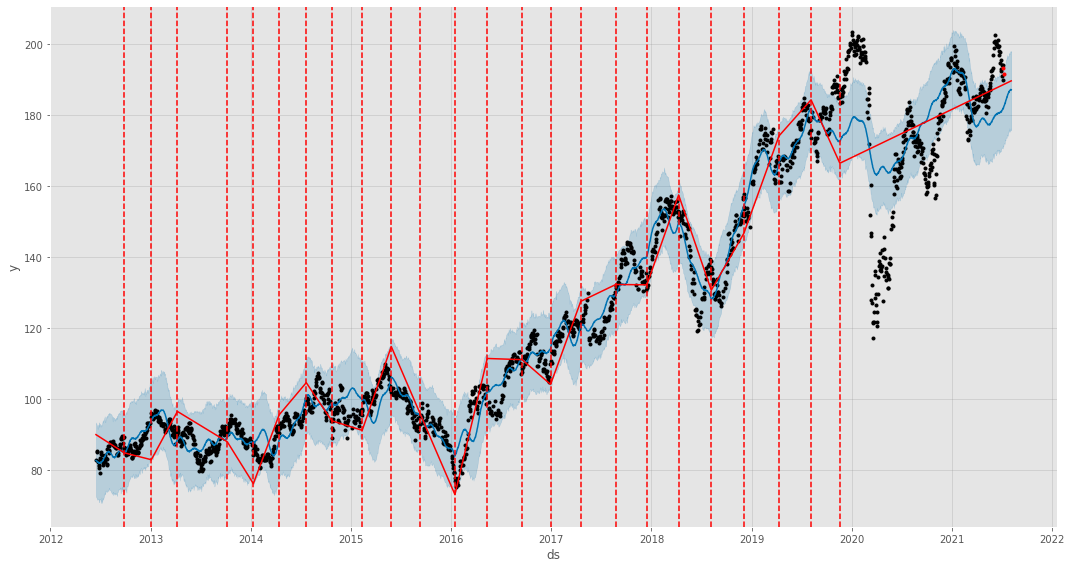

In [219]:
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(ecoo_previsao, figsize=(15,8));
a = add_changepoints_to_plot(fig.gca(), model, ecoo_previsao)
plt.plot(ecoo11_test['ds'], ecoo11_test['y'], '.r') 

Apesar do modelo acima estar se ajustando bem aos dados, os outliers principalmente durante os circuit break em Março/2020 estão causando distorções na parte final da previsão, vamos retirar esses outliers e fazer mais algumas tunagens no modelo para tentarmos melhorar a previsão.

In [237]:
#excluindo outliers
novo_y = ecoo11_train.reset_index()
novo_y = novo_y[(novo_y['y'] > ecoo_previsao['yhat_lower'][:1981]) & (novo_y['y'] < ecoo_previsao['yhat_upper'][:1981])]
ecoo_previsao_sem_outliers = novo_y.loc[:, ['ds', 'y']]
ecoo_previsao_sem_outliers.head()

,ds,y
0,2012-06-15,82.8465
1,2012-06-19,85.2885
2,2012-06-20,84.9750
3,2012-06-21,82.6155
4,2012-06-22,82.3680


In [238]:
model_sem_outliers = Prophet(changepoint_prior_scale=0.5, seasonality_prior_scale=0.01, daily_seasonality=True, changepoint_range=0.9)

In [239]:
model_sem_outliers.fit(ecoo_previsao_sem_outliers)

In [240]:
ecoo_futuro_sem_outliers = model.make_future_dataframe(periods=40)

In [241]:
ecoo_futuro_sem_outliers['day'] = ecoo_futuro_sem_outliers['ds'].dt.weekday
ecoo_futuro_sem_outliers = ecoo_futuro_sem_outliers[ecoo_futuro_sem_outliers['day']<=4]

In [242]:
ecoo_previsao_sem_outliers = model_sem_outliers.predict(ecoo_futuro_sem_outliers)

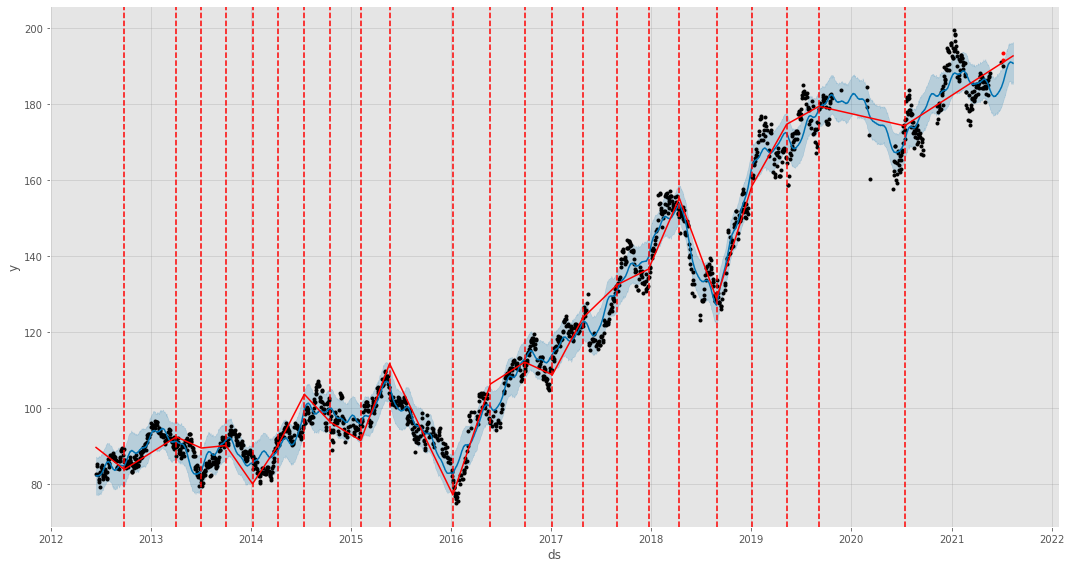

In [243]:
fig = model_sem_outliers.plot(ecoo_previsao_sem_outliers, figsize=(15,8));
a = add_changepoints_to_plot(fig.gca(), model_sem_outliers, ecoo_previsao_sem_outliers)
plt.plot(ecoo11_test['ds'], ecoo11_test['y'], '.r') 

Validação cruzada do modelo sem outliers

In [220]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [245]:
df_cv = cross_validation(model_sem_outliers, horizon='30 days', parallel="processes")
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,21.910017,4.680814,3.652238,0.028567,0.023680,0.475000
1,4 days,22.573560,4.751164,3.717722,0.029362,0.024196,0.474576
2,5 days,22.879757,4.783279,3.803643,0.030521,0.025453,0.433898
3,6 days,27.392795,5.233813,4.036392,0.032146,0.027517,0.424162
4,7 days,31.724170,5.632421,4.295222,0.033717,0.028755,0.423292
5,8 days,34.259852,5.853192,4.431447,0.034894,0.029054,0.434164
6,9 days,34.176682,5.846083,4.445139,0.035248,0.029439,0.423961
7,10 days,33.447807,5.783408,4.391748,0.034881,0.029249,0.419019
8,11 days,35.255452,5.937630,4.461413,0.034757,0.027611,0.431627
9,12 days,38.059099,6.169206,4.697767,0.036223,0.029249,0.398058


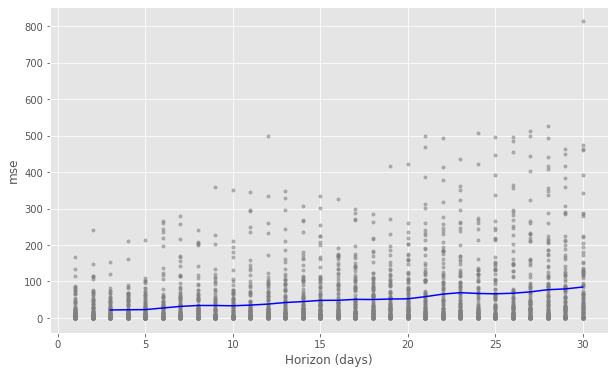

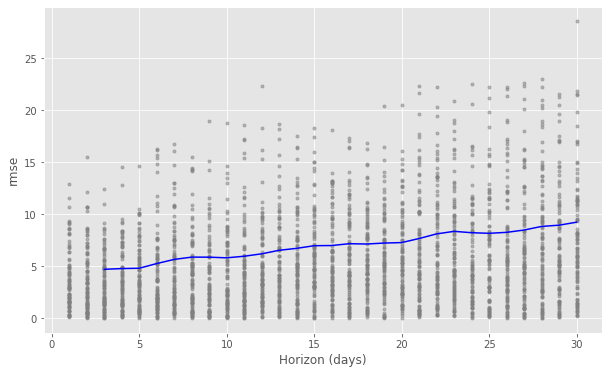

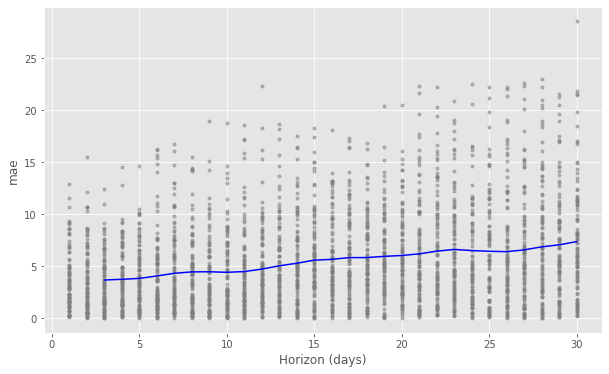

In [251]:
ax[0] = plot_cross_validation_metric(df_cv, 'mse')
ax[1] = plot_cross_validation_metric(df_cv, 'rmse')
ax[2] = plot_cross_validation_metric(df_cv, 'mae')

plt.plot();

##Conclusões sobre previsão de Séries Temporais com Facebook Prophet

---
Depois de mais de 8 horas de teste. Validando diferentes tunagens nos parâmetros do Prophet acreditamos que chegamos em um modelo satisfatório para previsão dos preços.

Utilizando um **changepoint_prior_scale=0.5, seasonality_prior_scale=0.01 com sazonalidade diária ativada, changepoint_range de 90% e com limpeza dos outliers que causavam grandes distorções** o modelo diminuiu significativamente os erros médios.

No entanto ressaltamos que ao observar as métricas de performance o algoritmo se mantém próximo a 0 com menor distância entre os erros para até 5 dias de previsão. O que pode ser um reflexo da grande volatilidade da Bolsa brasileira e de pressões que os ativos ainda sofrem devido ao cenário pandêmico.
